# Final Project - Neural Networks and Deep Learning
## Course Code : 2024S-T3 AML 3104
### Group Members 
- **Mahmood Hossain**
- ID : c0896079 

- **Nilesh Khurana**
- ID : c0894394

- **Chanpreet Kaur**
- ID : c0907021

- **Rajia Bano**
- ID : c0907016

### Introduction

Predicting real estate prices is a complex task influenced by a myriad of factors. In this project, we aim to leverage deep learning techniques to predict the sale price of properties. By analyzing a diverse set of features ranging from physical characteristics of the property to its location and the quality of various aspects of the building, we can develop a robust model that captures the intricate relationships within the data. The goal is to provide accurate predictions that can aid in decision-making processes for buyers, sellers, and real estate professionals.

### Abstract

This project explores the application of deep learning algorithms to predict real estate prices using a comprehensive dataset. The dataset includes 81 variables detailing various attributes of properties, such as building class, zoning classification, lot size, utility types, neighborhood characteristics, and overall quality and condition of the buildings. By employing advanced neural network architectures, we aim to create a predictive model that accurately forecasts the sale price of properties. The model's performance will be evaluated using appropriate metrics, and the results will be analyzed to understand the influence of different features on property prices.

### Project Objective

The primary objective of this project is to develop a deep learning model capable of predicting the sale price of properties based on a diverse set of features. The specific goals are:

1. **Data Preprocessing**: Clean and preprocess the dataset to handle missing values, encode categorical variables, and scale numerical features.
2. **Feature Engineering**: Explore and engineer features to enhance the model's predictive power.
3. **Model Development**: Design and implement various deep learning architectures to find the most effective model for price prediction.
4. **Model Evaluation**: Assess the performance of the models using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
5. **Feature Analysis**: Investigate the impact of different features on the prediction outcomes to gain insights into the key drivers of property prices.
6. **Optimization and Tuning**: Optimize the model through hyperparameter tuning to achieve the best possible performance.
7. **Deployment**: Create a deployment strategy for the model to be used in real-world applications, providing valuable predictions for stakeholders.

By accomplishing these objectives, the project aims to provide a reliable tool for predicting real estate prices, contributing to more informed decision-making in the real estate market.

Dataset Link : https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data


In [1]:
# loading the libraries 
import pandas as pd
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from geopy.geocoders import Nominatim
import folium
from IPython.display import display
import time
import re
import os
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import tensorflow as tf
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.base import BaseEstimator, RegressorMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from scipy.stats import skew
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint
import pickle

2024-07-24 17:20:56.109845: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-24 17:20:56.109983: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-24 17:20:56.270217: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Set options to display all columns
pd.set_option('display.max_columns', None)

# Set options to display all rows
pd.set_option('display.max_rows', None)

In [3]:
# reading the datasets and combining the train and test sets

df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

df = pd.concat([df_train, df_test], ignore_index=True).reset_index(drop=True)

In [4]:
# getting comprehensive information about the dataset

def check_df(dataframe, head=5):
    print("SHAPE".center(70,"-"))
    print(dataframe.shape)
    print("INFO".center(70,"-"))
    print(dataframe.info())
    print("NUNIQUE".center(70,"-"))
    print(dataframe.nunique())
    print("MISSING VALUES".center(70,"-"))
    print(dataframe.isnull().sum())
    print("DUPLICATED VALUES".center(70,"-"))
    print(dataframe.duplicated().sum())
    
    
check_df(df)

--------------------------------SHAPE---------------------------------
(2919, 81)
---------------------------------INFO---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   

As we can see, there are few columns which have a good number of data missing. We have to find out a way to deal with these missing values.

In [5]:
# what is the percentage of data missing
missing_percentage = df.isnull().mean() * 100
missing_percentage

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
B

Columns like **Alley, PoolQC, Fence  and MiscFeature** have almost **80-90%** data missing. We can think of removing these features.

In [6]:
# looking at the dataset
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

We need to know what each of these features actually mean. We have a data description file to which we can look at

In [7]:
# data description 

with open('/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt', 'r') as file:
    description = file.read()

print(description)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## Data Cleaning

There are variety of features in the dataset. We will take a look at the features but before that we need to deeal with the missing values. As we have mentioned already, few features will not be able to help our model which have more than 80% missing values. We will remove them now.

In [8]:
# remove features with a high number of missing values

rem_cols = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
df.drop(columns=rem_cols, inplace=True)

FireplaceQu and MasVnrType columns have 40 - 60% data missing. We need to deal with these columns but before that lets take a look at what they mean. MasVnrType means Masonry veneer type and FireplaceQu means Fireplace Quality. For MasVnrType, we will use 'mode' and for FireplaceQu we will use 'mean' to fill the null values. But before that, we need to encode the categorical columns to number.

In [9]:
# numeric columns
num_cols = df.select_dtypes(include=['number']).columns.tolist()

# non-numeric columns
non_num_cols = df.select_dtypes(exclude=['number']).columns.tolist()

In [10]:
# ensuring the data types of both types of columns 
num_cols_dtypes = df[num_cols].dtypes
non_num_cols_dtypes = df[non_num_cols].dtypes

In [11]:
num_cols_dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
dtype: object

In [12]:
non_num_cols_dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [13]:
# label encoding
encoders = {}

# Label encode each categorical column
for column in non_num_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    encoders[column] = le

# Print the DataFrame with encoded categorical columns
print("DataFrame with Label Encoded Categorical Columns:")
df.head()

DataFrame with Label Encoded Categorical Columns:


Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          60         3         65.0     8450       1         3   
1   2          20         3         80.0     9600       1         3   
2   3          60         3         68.0    11250       1         0   
3   4          70         3         60.0     9550       1         0   
4   5          60         3         84.0    14260       1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             5           2   
1            3          0          2          0            24           1   
2            3          0          4          0             5           2   
3            3          0          0          0             6           2   
4            3          0          2          0            15           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5            7            5       2003   
1           2         0           2            6            8       1976   
2           2         0           5            7            5       2001   
3           2         0           5            7            5       1915   
4           2         0           5            8            5       2000   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          1         1           12           13           1   
1          1976          1         1            8            8           3   
2          2002          1         1           12           13           1   
3          1970          1         1           13           15           3   
4          2000          1         1           12           13           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          4           2         2         3   
1         0.0          3          4           1         2         3   
2       162.0          2          4           2         2         3   
3         0.0          3          4           0         3         1   
4       350.0          2          4           2         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             2       706.0             5         0.0   
1             1             0       978.0             5         0.0   
2             2             2       486.0             5         0.0   
3             3             0       216.0             5         0.0   
4             0             2       655.0             5         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0      150.0        856.0        1          0           1           4   
1      284.0       1262.0        1          0           1           4   
2      434.0        920.0        1          0           1           4   
3      540.0        756.0        1          2           1           4   
4      490.0       1145.0        1          0           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710           1.0           0.0   
1      1262         0             0       1262           0.0           1.0   
2       920       866             0       1786           1.0           0.0   
3       961       756             0       1717           1.0           0.0   
4      1145      1053             0       2198           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            3             6   
2         2         1             3             1            2             6   
3         1         0             3             1            2             7   
4         2         1    

In [14]:
# We can extract the labels of the encoded values if we need to see
print("\nLabel Encoders:")
for column, le in encoders.items():
    print(f"Column: {column}")
    print(dict(zip(le.classes_, le.transform(le.classes_))))


Label Encoders:
Column: MSZoning
{'C (all)': 0, 'FV': 1, 'RH': 2, 'RL': 3, 'RM': 4, nan: 5}
Column: Street
{'Grvl': 0, 'Pave': 1}
Column: LotShape
{'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3}
Column: LandContour
{'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3}
Column: Utilities
{'AllPub': 0, 'NoSeWa': 1, nan: 2}
Column: LotConfig
{'Corner': 0, 'CulDSac': 1, 'FR2': 2, 'FR3': 3, 'Inside': 4}
Column: LandSlope
{'Gtl': 0, 'Mod': 1, 'Sev': 2}
Column: Neighborhood
{'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5, 'Crawfor': 6, 'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'NAmes': 12, 'NPkVill': 13, 'NWAmes': 14, 'NoRidge': 15, 'NridgHt': 16, 'OldTown': 17, 'SWISU': 18, 'Sawyer': 19, 'SawyerW': 20, 'Somerst': 21, 'StoneBr': 22, 'Timber': 23, 'Veenker': 24}
Column: Condition1
{'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'PosN': 4, 'RRAe': 5, 'RRAn': 6, 'RRNe': 7, 'RRNn': 8}
Column: Condition2
{'Artery': 0, 'Feedr': 1, 'Norm': 2, 'PosA': 3, 'P

Now lets first deal with the large null columns mentioned earlier

In [15]:
# Fill missing values in 'MasVnrType' with the mode
mas_vnr_type_mode = df['MasVnrType'].mode()[0]
df['MasVnrType'].fillna(mas_vnr_type_mode)

# Fill missing values in 'FireplaceQu' with the mean
fireplacequ_mean = df['FireplaceQu'].mean()
df['FireplaceQu'].fillna(fireplacequ_mean)

0       5
1       4
2       4
3       2
4       4
5       5
6       2
7       4
8       4
9       4
10      5
11      2
12      5
13      2
14      1
15      5
16      4
17      5
18      5
19      5
20      2
21      2
22      2
23      4
24      4
25      2
26      5
27      2
28      2
29      5
30      5
31      5
32      5
33      2
34      2
35      2
36      5
37      4
38      5
39      5
40      4
41      2
42      5
43      5
44      5
45      2
46      0
47      5
48      5
49      5
50      5
51      2
52      5
53      2
54      4
55      2
56      5
57      5
58      2
59      5
60      5
61      5
62      2
63      5
64      5
65      2
66      2
67      5
68      5
69      4
70      2
71      5
72      4
73      5
74      5
75      5
76      5
77      5
78      5
79      5
80      2
81      5
82      2
83      5
84      4
85      4
86      2
87      5
88      5
89      5
90      5
91      5
92      5
93      2
94      5
95      4
96      5
97      5
98      5
99      5


Rest of the null values in other columns are not significantly bigger. So we can use 'mean' to fill the rest. 

In [16]:
# checking if there is any null values 
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       486
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          1
BsmtFinType2        0
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [17]:
# fill null values with mean for all columns except 'SalePrice'
def fill_na_with_mean(df, col):
    df[col] = df[col].fillna(df[col].mean())
    return df

# Apply the function to each column except 'SalePrice'
for col in df.columns:
    if col != 'SalePrice':
        df = fill_na_with_mean(df, col)

## Data Exploration
We are very interested to see the locations of the properties in a map. We have to decode the encoded values in the Neighborhood column. Then we will use folium and geopy libraries to get the coordinates of the locations and then we will see them on the map.

In [18]:
# Define the decoding mapping we got from the decode output previously
decode_map = {
    0: 'Blmngtn', 1: 'Blueste', 2: 'BrDale', 3: 'BrkSide', 4: 'ClearCr', 5: 'CollgCr', 6: 'Crawfor', 
    7: 'Edwards', 8: 'Gilbert', 9: 'IDOTRR', 10: 'MeadowV', 11: 'Mitchel', 12: 'NAmes', 13: 'NPkVill',
    14: 'NWAmes', 15: 'NoRidge', 16: 'NridgHt', 17: 'OldTown', 18: 'SWISU', 19: 'Sawyer', 20: 'SawyerW',
    21: 'Somerst', 22: 'StoneBr', 23: 'Timber', 24: 'Veenker'
}

# Decode the 'Neighborhood' column
df['Neighborhood_Decoded'] = df['Neighborhood'].map(decode_map)


In [19]:
# We need the full forms of the location to give actual location to geopy  
full_form_map = {
    'Blmngtn': 'Bloomington Heights', 'Blueste': 'Bluestem', 'BrDale': 'Briardale', 'BrkSide': 'Brookside',
    'ClearCr': 'Clear Creek', 'CollgCr': 'College Creek', 'Crawfor': 'Crawford', 'Edwards': 'Edwards',
    'Gilbert': 'Gilbert', 'IDOTRR': 'Iowa DOT and Rail Road', 'MeadowV': 'Meadow Village', 'Mitchel': 'Mitchell',
    'NAmes': 'North Ames', 'NoRidge': 'Northridge', 'NPkVill': 'Northpark Villa', 'NridgHt': 'Northridge Heights',
    'NWAmes': 'Northwest Ames', 'OldTown': 'Old Town', 'SWISU': 'South & West of Iowa State University',
    'Sawyer': 'Sawyer', 'SawyerW': 'Sawyer West', 'Somerst': 'Somerset', 'StoneBr': 'Stone Brook',
    'Timber': 'Timberland', 'Veenker': 'Veenker'
}

# Apply the mapping to create a new column with full forms
df['Neighborhood_Full'] = df['Neighborhood_Decoded'].map(full_form_map)

In [20]:
df.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          60         3         65.0     8450       1         3   
1   2          20         3         80.0     9600       1         3   
2   3          60         3         68.0    11250       1         0   
3   4          70         3         60.0     9550       1         0   
4   5          60         3         84.0    14260       1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             5           2   
1            3          0          2          0            24           1   
2            3          0          4          0             5           2   
3            3          0          0          0             6           2   
4            3          0          2          0            15           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5            7            5       2003   
1           2         0           2            6            8       1976   
2           2         0           5            7            5       2001   
3           2         0           5            7            5       1915   
4           2         0           5            8            5       2000   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          1         1           12           13           1   
1          1976          1         1            8            8           3   
2          2002          1         1           12           13           1   
3          1970          1         1           13           15           3   
4          2000          1         1           12           13           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          4           2         2         3   
1         0.0          3          4           1         2         3   
2       162.0          2          4           2         2         3   
3         0.0          3          4           0         3         1   
4       350.0          2          4           2         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             2       706.0             5         0.0   
1             1             0       978.0             5         0.0   
2             2             2       486.0             5         0.0   
3             3             0       216.0             5         0.0   
4             0             2       655.0             5         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0      150.0        856.0        1          0           1           4   
1      284.0       1262.0        1          0           1           4   
2      434.0        920.0        1          0           1           4   
3      540.0        756.0        1          2           1           4   
4      490.0       1145.0        1          0           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710           1.0           0.0   
1      1262         0             0       1262           0.0           1.0   
2       920       866             0       1786           1.0           0.0   
3       961       756             0       1717           1.0           0.0   
4      1145      1053             0       2198           1.0           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            3             6   
2         2         1             3             1            2             6   
3         1         0             3             1            2             7   
4         2         1    

Now we will create a function to get actual co-ordinates of the locations 

In [21]:
# Initialize Geocoder
geolocator = Nominatim(user_agent="geoapiExercises")

# Function to geocode neighborhood
def geocode_neighborhood(neighborhood):
    try:
        location = geolocator.geocode(neighborhood + ', Ames, IA')
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Error geocoding {neighborhood}: {e}")
        return None, None

In [22]:
# Apply geocoding to full form neighborhoods
df[['Latitude', 'Longitude']] = df['Neighborhood_Full'].apply(lambda x: pd.Series(geocode_neighborhood(x)))

The geopy library was successfull filling in the co-ordinates of the locations. However, it could not find some of them. We will be doing some research on our own on google to find out those locations and manually fill in the co-ordinates.

In [23]:
# extracting the locations from error message



# Sample error messages
error_messages = """
Error geocoding College Creek: Non-successful status code 403
Error geocoding North Ames: Non-successful status code 403
Error geocoding South & West of Iowa State University: Non-successful status code 403
Error geocoding South & West of Iowa State University: Non-successful status code 403
Error geocoding Northwest Ames: Non-successful status code 403
Error geocoding Edwards: Non-successful status code 403
Error geocoding Mitchell: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Mitchell%2C+Ames%2C+IA&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error geocoding Old Town: Non-successful status code 403
Error geocoding South & West of Iowa State University: Non-successful status code 403
Error geocoding South & West of Iowa State University: Non-successful status code 403
Error geocoding South & West of Iowa State University: Non-successful status code 403
Error geocoding Clear Creek: Non-successful status code 403
Error geocoding South & West of Iowa State University: Non-successful status code 403
Error geocoding South & West of Iowa State University: Non-successful status code 403
Error geocoding Somerset: Non-successful status code 403
Error geocoding South & West of Iowa State University: Non-successful status code 403
Error geocoding South & West of Iowa State University: Non-successful status code 403
Error geocoding Old Town: Non-successful status code 403
Error geocoding Iowa DOT and Rail Road: Non-successful status code 403
Error geocoding Sawyer West: Non-successful status code 403
Error geocoding Edwards: Non-successful status code 403
Error geocoding Meadow Village: Non-successful status code 403
Error geocoding Old Town: Non-successful status code 403
Error geocoding Old Town: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Old+Town%2C+Ames%2C+IA&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error geocoding South & West of Iowa State University: Non-successful status code 403
Error geocoding Sawyer: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Sawyer%2C+Ames%2C+IA&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error geocoding College Creek: Non-successful status code 403
Error geocoding Edwards: Non-successful status code 403
Error geocoding Edwards: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Edwards%2C+Ames%2C+IA&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error geocoding Edwards: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Edwards%2C+Ames%2C+IA&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
"""

# Use regex to extract the location names from the error messages
pattern = r"Error geocoding ([\w\s&]+):"
locations_not_found = re.findall(pattern, error_messages)

# Remove duplicates
locations_not_found = list(set(locations_not_found))

# Display the list
print(locations_not_found)


In [24]:
coordinates = {
    'Gilbert' : '42.107339, -93.650046',
    'Timberland' : '42.000054, -93.649546', 
    'Edwards' : '42.024238, -93.671078', 
    'South & West of Iowa State University' : '42.021641, -93.656344', 
    'Old Town' : '42.029275, -93.614412', 
    'North Ames': '42.034866, -93.647473', 
    'Clear Creek' : '42.036081, -93.648845', 
    'Brookside' : '42.028438, -93.631153', 
    'Somerset' : '42.050756, -93.644471'
}

# Split coordinates and assign to respective columns
for neighborhood, coord in coordinates.items():
    lat, lon = map(float, coord.split(', '))
    df.loc[df['Neighborhood_Full'] == neighborhood, 'Latitude'] = lat
    df.loc[df['Neighborhood_Full'] == neighborhood, 'Longitude'] = lon

In [25]:
# Check for NaN values in Latitude and Longitude
nan_coords = df[df['Latitude'].isna() | df['Longitude'].isna()]

# Print the rows with NaN values in Latitude and Longitude along with Neighborhood_Full
unique_nan_neighborhoods = nan_coords['Neighborhood_Full'].unique()
print(unique_nan_neighborhoods)

There are still some locations without the coordinates. We will fill in with the same manual process. 

In [26]:
coordinates = {
    'Northwest Ames' : '42.049205, -93.652850', 
    'Sawyer West' : '42.021202, -93.680265', 
    'Iowa DOT and Rail Road' : '42.021948, -93.621307', 
    'Meadow Village' : '41.992291, -93.603508',
    'Stone Brook' : '42.060080, -93.636868', 
    'Northpark Villa' : '42.053359, -93.648615',
    'Northridge' : '42.048305, -93.648429',
    'Northridge Heights' : '42.059853, -93.650201',
    'Crawford' : '42.028077, -93.607049',
    'Bloomington Heights' : '42.056526, -93.635387',
    'Bluestem' : '42.045443, -93.652500',
    'Briardale' : '42.052624, -93.628840',
    'Veenker' : '42.042389, -93.648557',
    'College Creek' : '42.022005, -93.652025',
    'Mitchell' : '41.990092, -93.601829',
    'Sawyer' : '42.033483, -93.676200'
}

# Split coordinates and assign to respective columns
for neighborhood, coord in coordinates.items():
    lat, lon = map(float, coord.split(', '))
    df.loc[df['Neighborhood_Full'] == neighborhood, 'Latitude'] = lat
    df.loc[df['Neighborhood_Full'] == neighborhood, 'Longitude'] = lon

In [27]:
# checking again for the null values in the coordinates
nan_coords = df[df['Latitude'].isna() | df['Longitude'].isna()]

# Print the rows with NaN values in Latitude and Longitude along with Neighborhood_Full
unique_nan_neighborhoods = nan_coords['Neighborhood_Full'].unique()
print(unique_nan_neighborhoods)

In [28]:
df.to_csv('data_encoded.csv', index = False)

PERFECT ! All the coordinates are filled. Now we will try to see the locations on map. 

In [30]:
df = pd.read_csv('/kaggle/input/data-encoded/data_encoded.csv')

In [31]:
df.head(10)

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          60         3    65.000000     8450       1         3   
1   2          20         3    80.000000     9600       1         3   
2   3          60         3    68.000000    11250       1         0   
3   4          70         3    60.000000     9550       1         0   
4   5          60         3    84.000000    14260       1         0   
5   6          50         3    85.000000    14115       1         0   
6   7          20         3    75.000000    10084       1         3   
7   8          60         3    69.305795    10382       1         0   
8   9          50         4    51.000000     6120       1         3   
9  10         190         3    50.000000     7420       1         3   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             5           2   
1            3          0          2          0            24           1   
2            3          0          4          0             5           2   
3            3          0          0          0             6           2   
4            3          0          2          0            15           2   
5            3          0          4          0            11           2   
6            3          0          4          0            21           2   
7            3          0          0          0            14           4   
8            3          0          4          0            17           0   
9            3          0          0          0             3           0   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5            7            5       2003   
1           2         0           2            6            8       1976   
2           2         0           5            7            5       2001   
3           2         0           5            7            5       1915   
4           2         0           5            8            5       2000   
5           2         0           0            5            5       1993   
6           2         0           2            8            5       2004   
7           2         0           5            7            6       1973   
8           2         0           0            7            5       1931   
9           0         1           1            5            6       1939   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          1         1           12           13           1   
1          1976          1         1            8            8           3   
2          2002          1         1           12           13           1   
3          1970          1         1           13           15           3   
4          2000          1         1           12           13           1   
5          1995          1         1           12           13           3   
6          2005          1         1           12           13           2   
7          1973          1         1            6            6           2   
8          1950          1         1            3           15           3   
9          1950          1         1            8            8           3   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          4           2         2         3   
1         0.0          3          4           1         2         3   
2       162.0          2          4           2         2         3   
3         0.0          3          4           0         3         1   
4       350.0          2          4           2         2         3   
5         0.0          3          4           5         2         3   
6       186.0          2          4           2         0         3   
7       240.0          3          4           1         2         3   
8         0.0          3          4   

We will create two types of maps. 

**Marker Clusters**:

* MarkerCluster: Creates a cluster of markers that group together when zoomed out.
Add Markers: Adds each location as a marker to the cluster with the corresponding neighborhood name in the popup.
Heatmaps:

* HeatMap: Visualizes the density of points using a color gradient.

In [32]:
# Create a folium map centered around Ames, IA
map_ames = folium.Map(location=[42.034866, -93.647473], zoom_start=12)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(map_ames)

# Add markers to the cluster
for index, row in df.iterrows():
    folium.Marker(
        location=(row['Latitude'], row['Longitude']),
        popup=row['Neighborhood_Full']
    ).add_to(marker_cluster)

# Display the map
map_ames.save("ames_marker_cluster_map.html")  # Save to an HTML file
map_ames

In [33]:
# Prepare data for heatmap
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]

# Add heatmap to the map
HeatMap(heat_data).add_to(map_ames)

# Display the map
map_ames.save("ames_heatmap.html")  # Save to an HTML file
map_ames

The most number of listed properties in the dataset belong to the central, northern side and south west side of the region. Next we will see the yearly and monthly sales of each property. 

#### Yearly and Monthly Sales

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


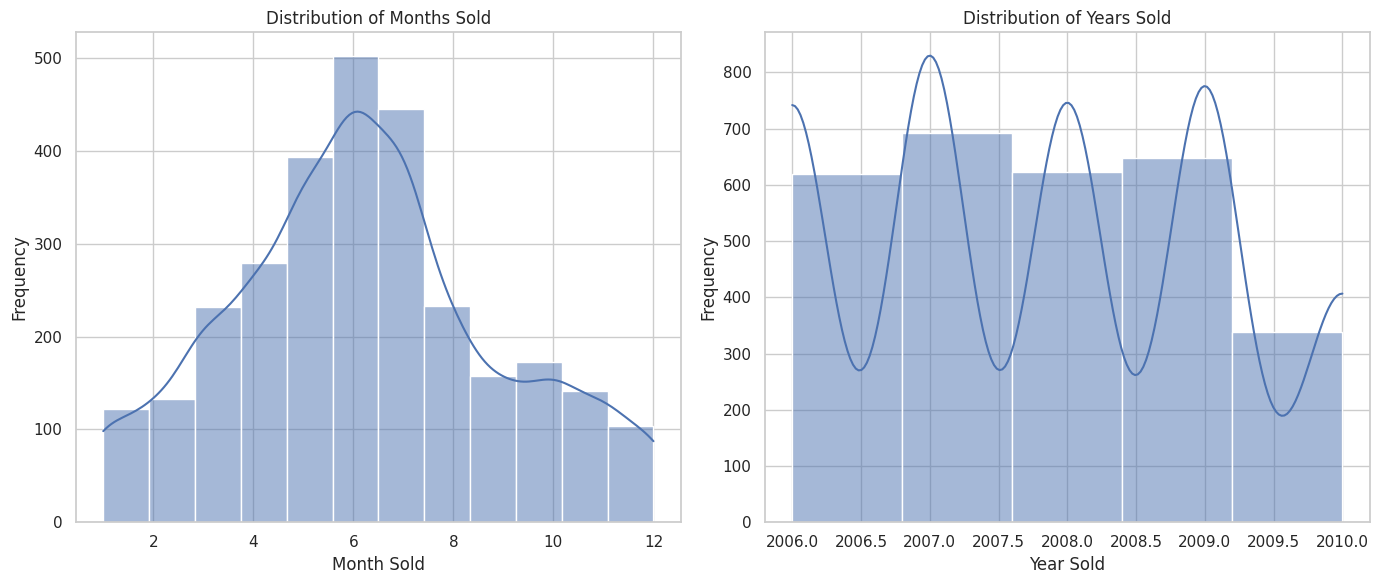

In [53]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the distribution of months sold
sns.histplot(df['MoSold'], bins=12, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Months Sold')
axes[0].set_xlabel('Month Sold')
axes[0].set_ylabel('Frequency')

# Plot the distribution of years sold
sns.histplot(df['YrSold'], bins=len(df['YrSold'].unique()), kde=True, ax=axes[1])
axes[1].set_title('Distribution of Years Sold')
axes[1].set_xlabel('Year Sold')
axes[1].set_ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

The monthly sell represents a normal distribution which indicates that the highest number of sells happen in the middle of the year. The most number of houses were sold in the years 2007 and 2009. 

#### Sale Price Analysis

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


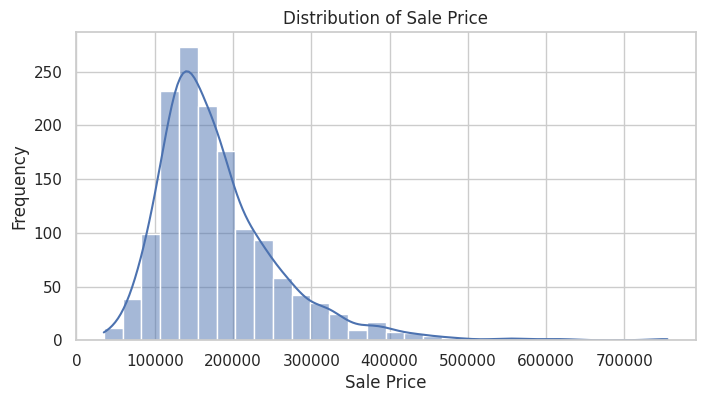

In [54]:
# Set the size of the plot
plt.figure(figsize=(8, 4))

# Plotting the histogram and distribution plot for SalePrice
sns.histplot(df['SalePrice'], kde=True, bins=30)

# Adding titles and labels
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

# Display the plot
plt.show()

* Most houses are sold which have prices around 200,000 dollars. 
* The count is extremely high comparing to other price ranges. 
* Next highest count is for the price range between '100k- 200k'. 
* More expensive houses beyoind 200k are least sold. 
* It gives us an idea about the earning capacity of the population of Ames Iowa. Looking at the plot, this is our assumption that mostly the higher middle class people live in that area followed by the middle class, lower middle class and extremely rich people.

#### Building Characteristics

**Distribution of building classes**

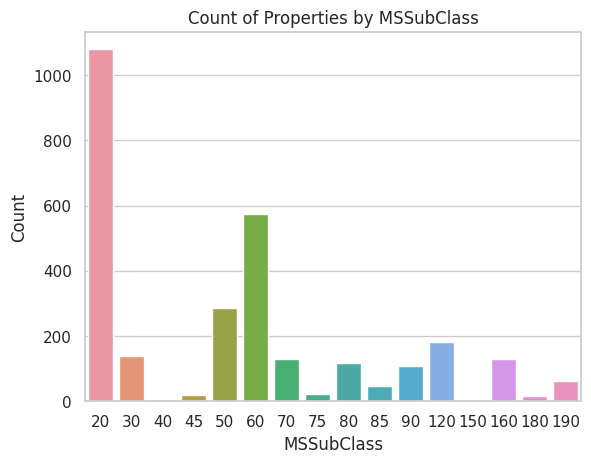

In [55]:
# Plotting the bar plot for MSSubClass
sns.countplot(data=df, x='MSSubClass')

# Adding titles and labels
plt.title('Count of Properties by MSSubClass')
plt.xlabel('MSSubClass')
plt.ylabel('Count')

# Display the plot
plt.show()

Most types of houses in the dataset are : 
1. 1-STORY 1946 & NEWER ALL STYLES
2. 2-STORY 1946 & NEWER
3. 1-1/2 STORY FINISHED ALL AGES
4. 1-STORY PUD (Planned Unit Development) - 1946 & NEWER

Least types of houses in the dataset are : 
1. 1-1/2 STORY - UNFINISHED ALL AGES
2. 2-1/2 STORY ALL AGES
3. PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
4. SPLIT FOYER

#### Proportion of Different Types in The Dataset

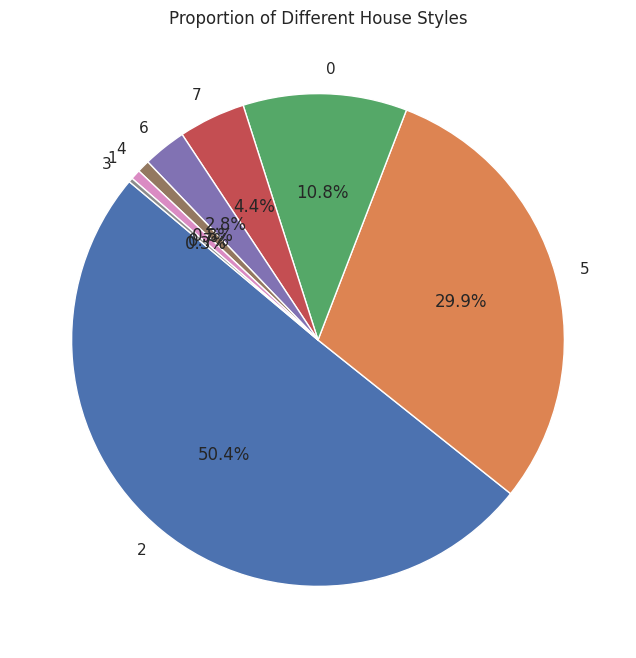

In [56]:
# Calculate the count of each HouseStyle
house_style_counts = df['HouseStyle'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(house_style_counts, labels=house_style_counts.index, autopct='%1.1f%%', startangle=140)

# Adding title
plt.title('Proportion of Different House Styles')

# Display the plot
plt.show()

Class 2 represents "1Story" houses which account for more than 50% in the dataset. Followed by class 5 which represents '2Story' houses. 

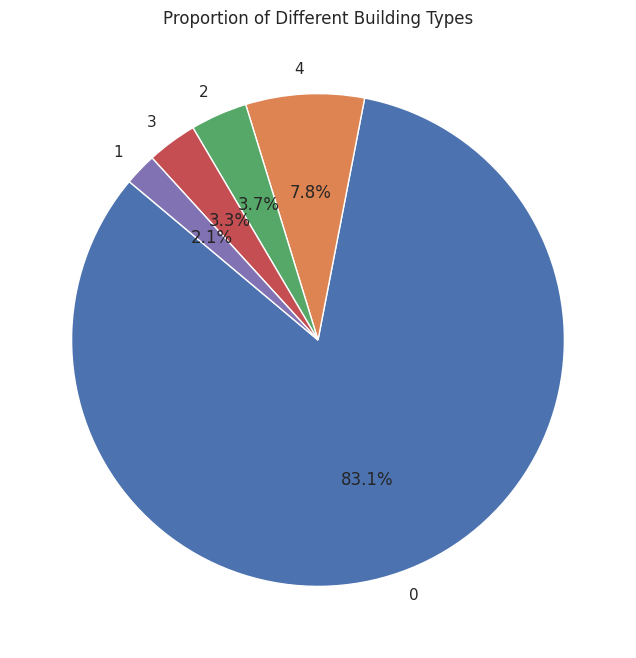

In [57]:
# Calculate the count of each BldgType
bldg_type_counts = df['BldgType'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(bldg_type_counts, labels=bldg_type_counts.index, autopct='%1.1f%%', startangle=140)

# Adding title
plt.title('Proportion of Different Building Types')

# Display the plot
plt.show()


The above visualization shows that class 0 that means Single-family Detached buildings are mostly in the dataset which is extremely high in number followed by class 4 - Townhouse Inside Unit types of buildings.

#### Overall Quality Vs Sales Price 

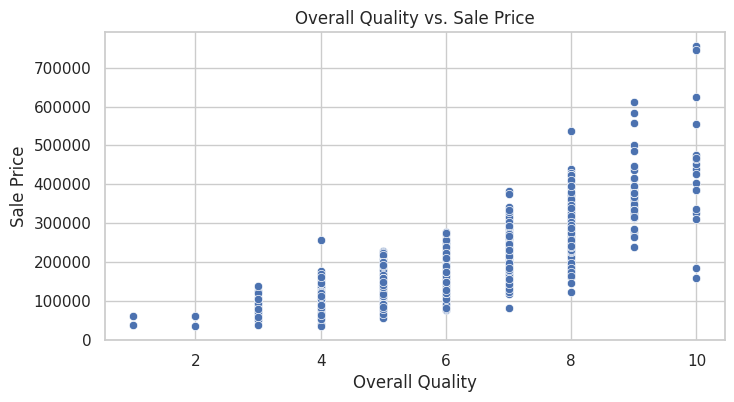

In [58]:
# Set the size of the plot
plt.figure(figsize=(8, 4))

# Plotting the scatter plot
sns.scatterplot(data=df, x='OverallQual', y='SalePrice')

# Adding titles and labels
plt.title('Overall Quality vs. Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')

# Display the plot
plt.show()


The above visualization shows that : 
1. Properties ranging from 100K - 200K include most various quality. Extremely good quality houses can be found as well within that range. That makes sense why most properties cost that range.
2. The properties above 200k dollars are extremely good quality properties. 

#### How lot size influences property prices

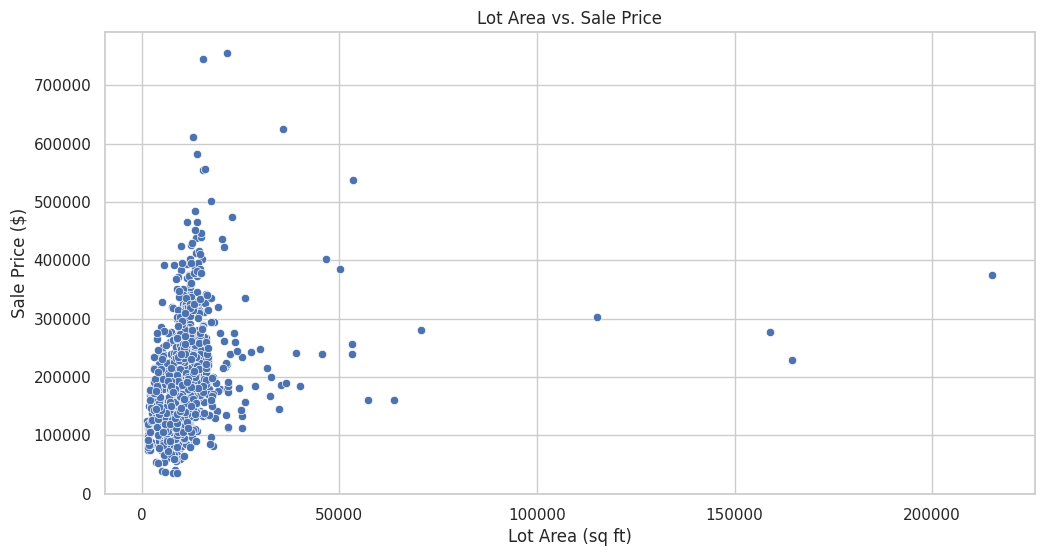

In [59]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plotting the scatter plot
sns.scatterplot(data=df, x='LotArea', y='SalePrice')

# Adding titles and labels
plt.title('Lot Area vs. Sale Price')
plt.xlabel('Lot Area (sq ft)')
plt.ylabel('Sale Price ($)')

# Display the plot
plt.show()

* The plot represents the relationship between the size of a property’s lot (measured in square feet) and its sale price (in dollars). 
* Most data points cluster at the lower end, indicating smaller lots with lower prices. 
* Larger lots show a slight trend toward higher prices

####  Compare the average SalePrice across different LotShape and LotConfig categories

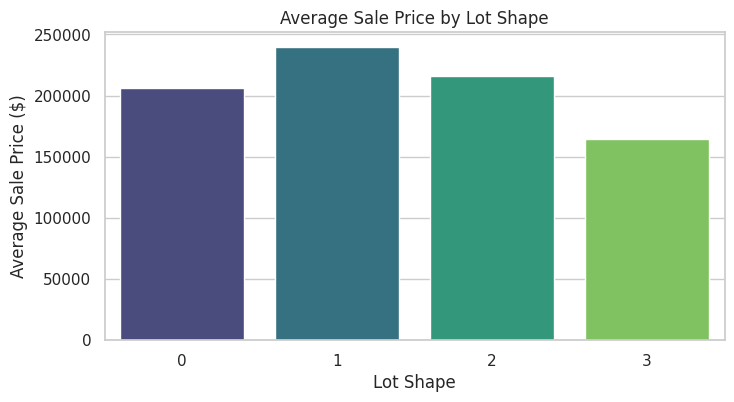

In [60]:
# Calculate the average SalePrice for each LotShape
avg_price_lotshape = df.groupby('LotShape')['SalePrice'].mean().reset_index()

# Set the size of the plot
plt.figure(figsize=(8, 4))

# Plotting the bar plot
sns.barplot(data=avg_price_lotshape, x='LotShape', y='SalePrice', palette='viridis')

# Adding titles and labels
plt.title('Average Sale Price by Lot Shape')
plt.xlabel('Lot Shape')
plt.ylabel('Average Sale Price ($)')

# Display the plot
plt.show()


* Regular shapes representing 0 is comparatively cheaper
* Slightly Irregular and Moderately Irregular shapes are comparatively higher in price

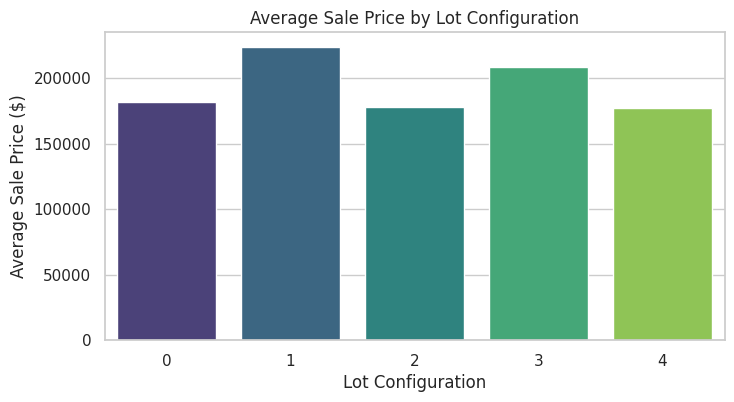

In [61]:
# Calculate the average SalePrice for each LotConfig
avg_price_lotconfig = df.groupby('LotConfig')['SalePrice'].mean().reset_index()

# Set the size of the plot
plt.figure(figsize=(8, 4))

# Plotting the bar plot
sns.barplot(data=avg_price_lotconfig, x='LotConfig', y='SalePrice', palette='viridis')

# Adding titles and labels
plt.title('Average Sale Price by Lot Configuration')
plt.xlabel('Lot Configuration')
plt.ylabel('Average Sale Price ($)')

# Display the plot
plt.show()


* Cul-de-sac house sits on a dead-end rounded street, facing other houses and creating a close-knit feeling between neighbors. That represents class 1 which are higher in price.
* Frontage on 3 sides of property types have second highest average price. 
* Other configurations are "Frontage on 2 sides of property", "Inside lot" and "Corner lot" which have a similar average price.

#### Compare The Average SalePrice Across Different ExterQual, BsmtQual, and GarageQual Categories.

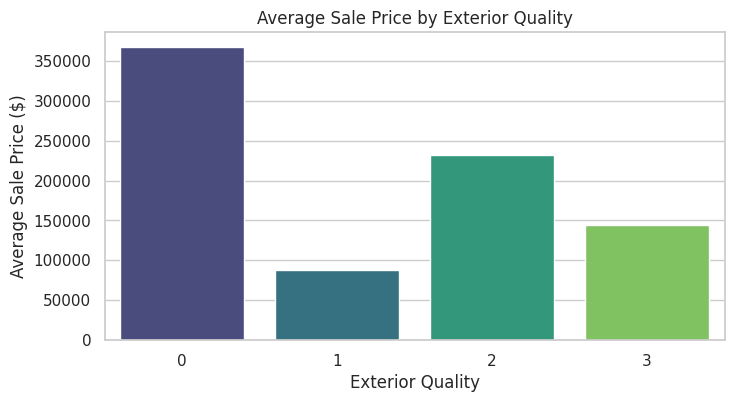

In [62]:
# Calculate the average SalePrice for each ExterQual
avg_price_exterqual = df.groupby('ExterQual')['SalePrice'].mean().reset_index()

# Set the size of the plot
plt.figure(figsize=(8, 4))

# Plotting the bar plot
sns.barplot(data=avg_price_exterqual, x='ExterQual', y='SalePrice', palette='viridis')

# Adding titles and labels
plt.title('Average Sale Price by Exterior Quality')
plt.xlabel('Exterior Quality')
plt.ylabel('Average Sale Price ($)')

# Display the plot
plt.show()


* 0 represents the 'Excellenet' quality properties which are obviously higher in price.
* 2 is the good quality properties which costs lower than the excellent ones.
* 3 is the typical or average types which comes next and the least expensive properties are 'fair' quality ones. There are no poor quality properties listed in the dataset.

#### Distribution of SalePrice by Condition1 and Condition2


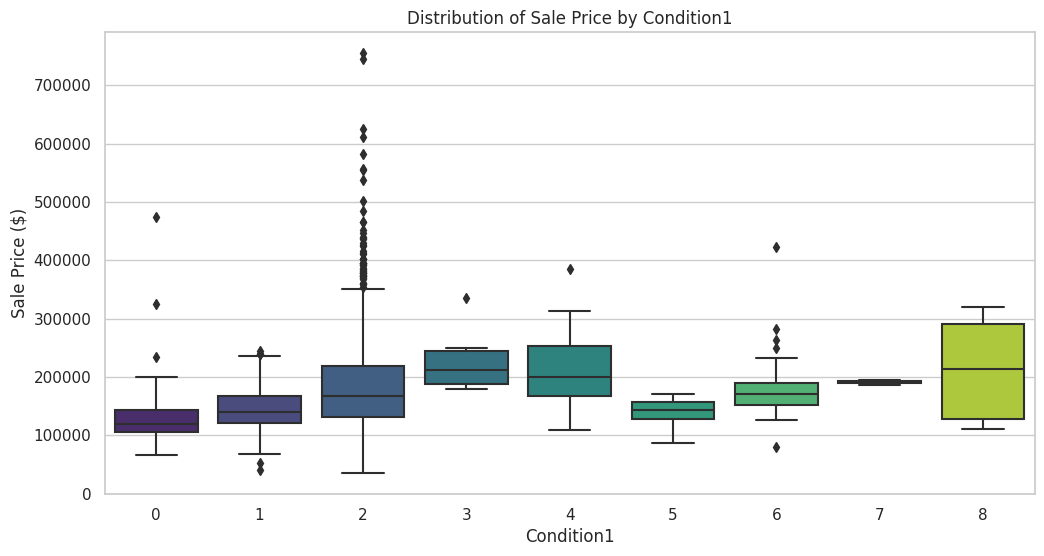

In [63]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plotting the box plot
sns.boxplot(data=df, x='Condition1', y='SalePrice', palette='viridis')

# Adding titles and labels
plt.title('Distribution of Sale Price by Condition1')
plt.xlabel('Condition1')
plt.ylabel('Sale Price ($)')

# Display the plot
plt.show()


Condition 1 is the Proximity to various conditions as follows : 

	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
       
* 2 represents the Normal condition properties which have a lot of outliers : extremely minimum and maximum sales price. That means normal type of properties are mostly sold in various price ranges.
* 0 represents the properties which are Adjacent to arterial street. These properties are sold in various prices , sometimes in extremely high prices.

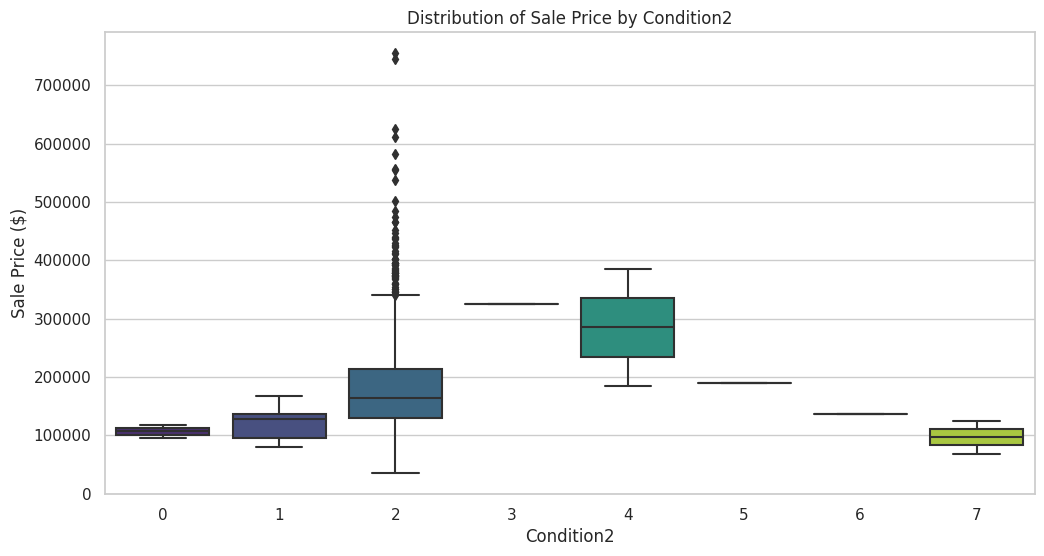

In [64]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plotting the box plot
sns.boxplot(data=df, x='Condition2', y='SalePrice', palette='viridis')

# Adding titles and labels
plt.title('Distribution of Sale Price by Condition2')
plt.xlabel('Condition2')
plt.ylabel('Sale Price ($)')

# Display the plot
plt.show()


Condition 2 represents the Proximity to various conditions (if more than one is present). From the plot above, we can observe number of things ; 

* Like condition 1, the normal properties are sold in extremely lower and higher prices than average
* For class 0 , the result is similar like condition 1 properties. 
* For class 4 , properties near positive off-site feature--park, greenbelt, etc, these are sold in higher prices comparing to having a single condition. 
* For properties within 200' of North-South Railroad, if they have multiple conditions present, they are sold in less prices comparing to having a single condition.

#### Statistical Analysis


In [65]:
df.describe().T.style.background_gradient(axis=0, cmap='Reds')

* High standard deviation for features like LotArea,MiscVal,
WoodDeckSF, GrLivArea, 2ndFlrSF, 1stFlrSF indicate that 
they have a very wide range which means these property features
have a great variety in the market. 

* In features like LotArea, MasVnrArea, BsmtFinSF1 and TotalBsmtSF
etc the IQR range is very high which indicates that there could be
outliers.

#### Compare SalePrice Across Different MSSubClass categories

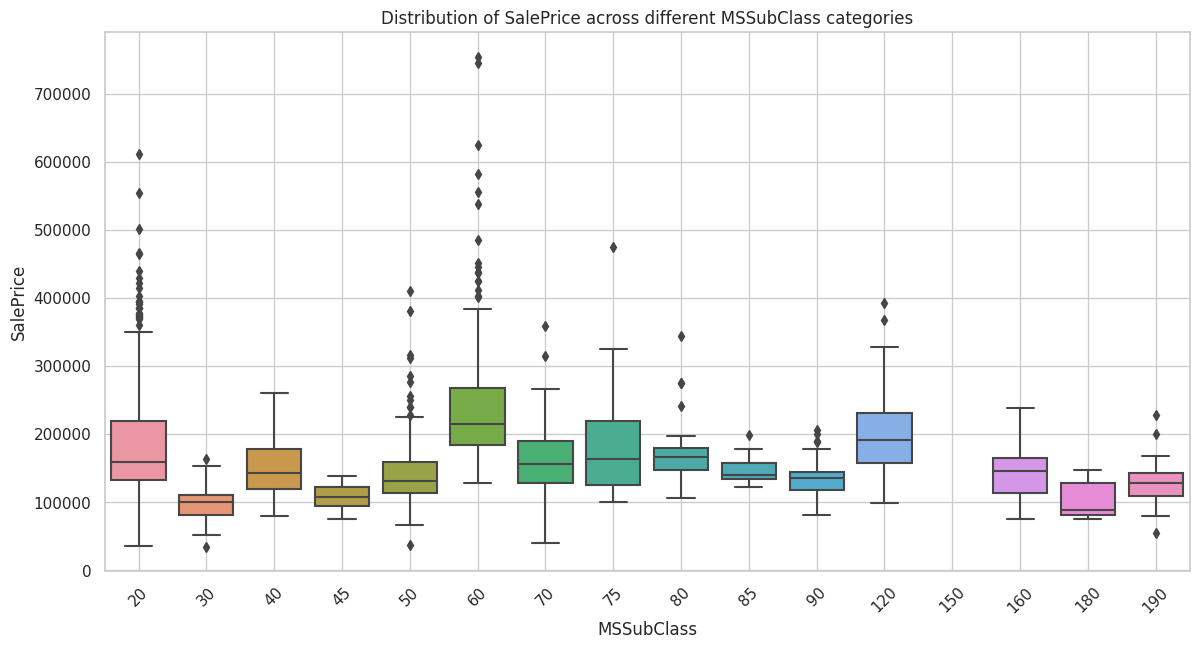

In [66]:
# Box Plot to visualize the distribution of SalePrice across different MSSubClass categories
plt.figure(figsize=(14, 7))
sns.boxplot(x='MSSubClass', y='SalePrice', data=df)
plt.title('Distribution of SalePrice across different MSSubClass categories')
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Practical Implication:**

Different building classes (MSSubClass) have significantly different average SalePrices. This suggests that the type of building class is an important factor affecting property prices. Further investigation into which specific classes have higher or lower average SalePrices can provide insights for real estate pricing strategies.

#### Skewness, Kurtosis and Normality Tests
We will assess the distributions and check for normality for few continuous features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

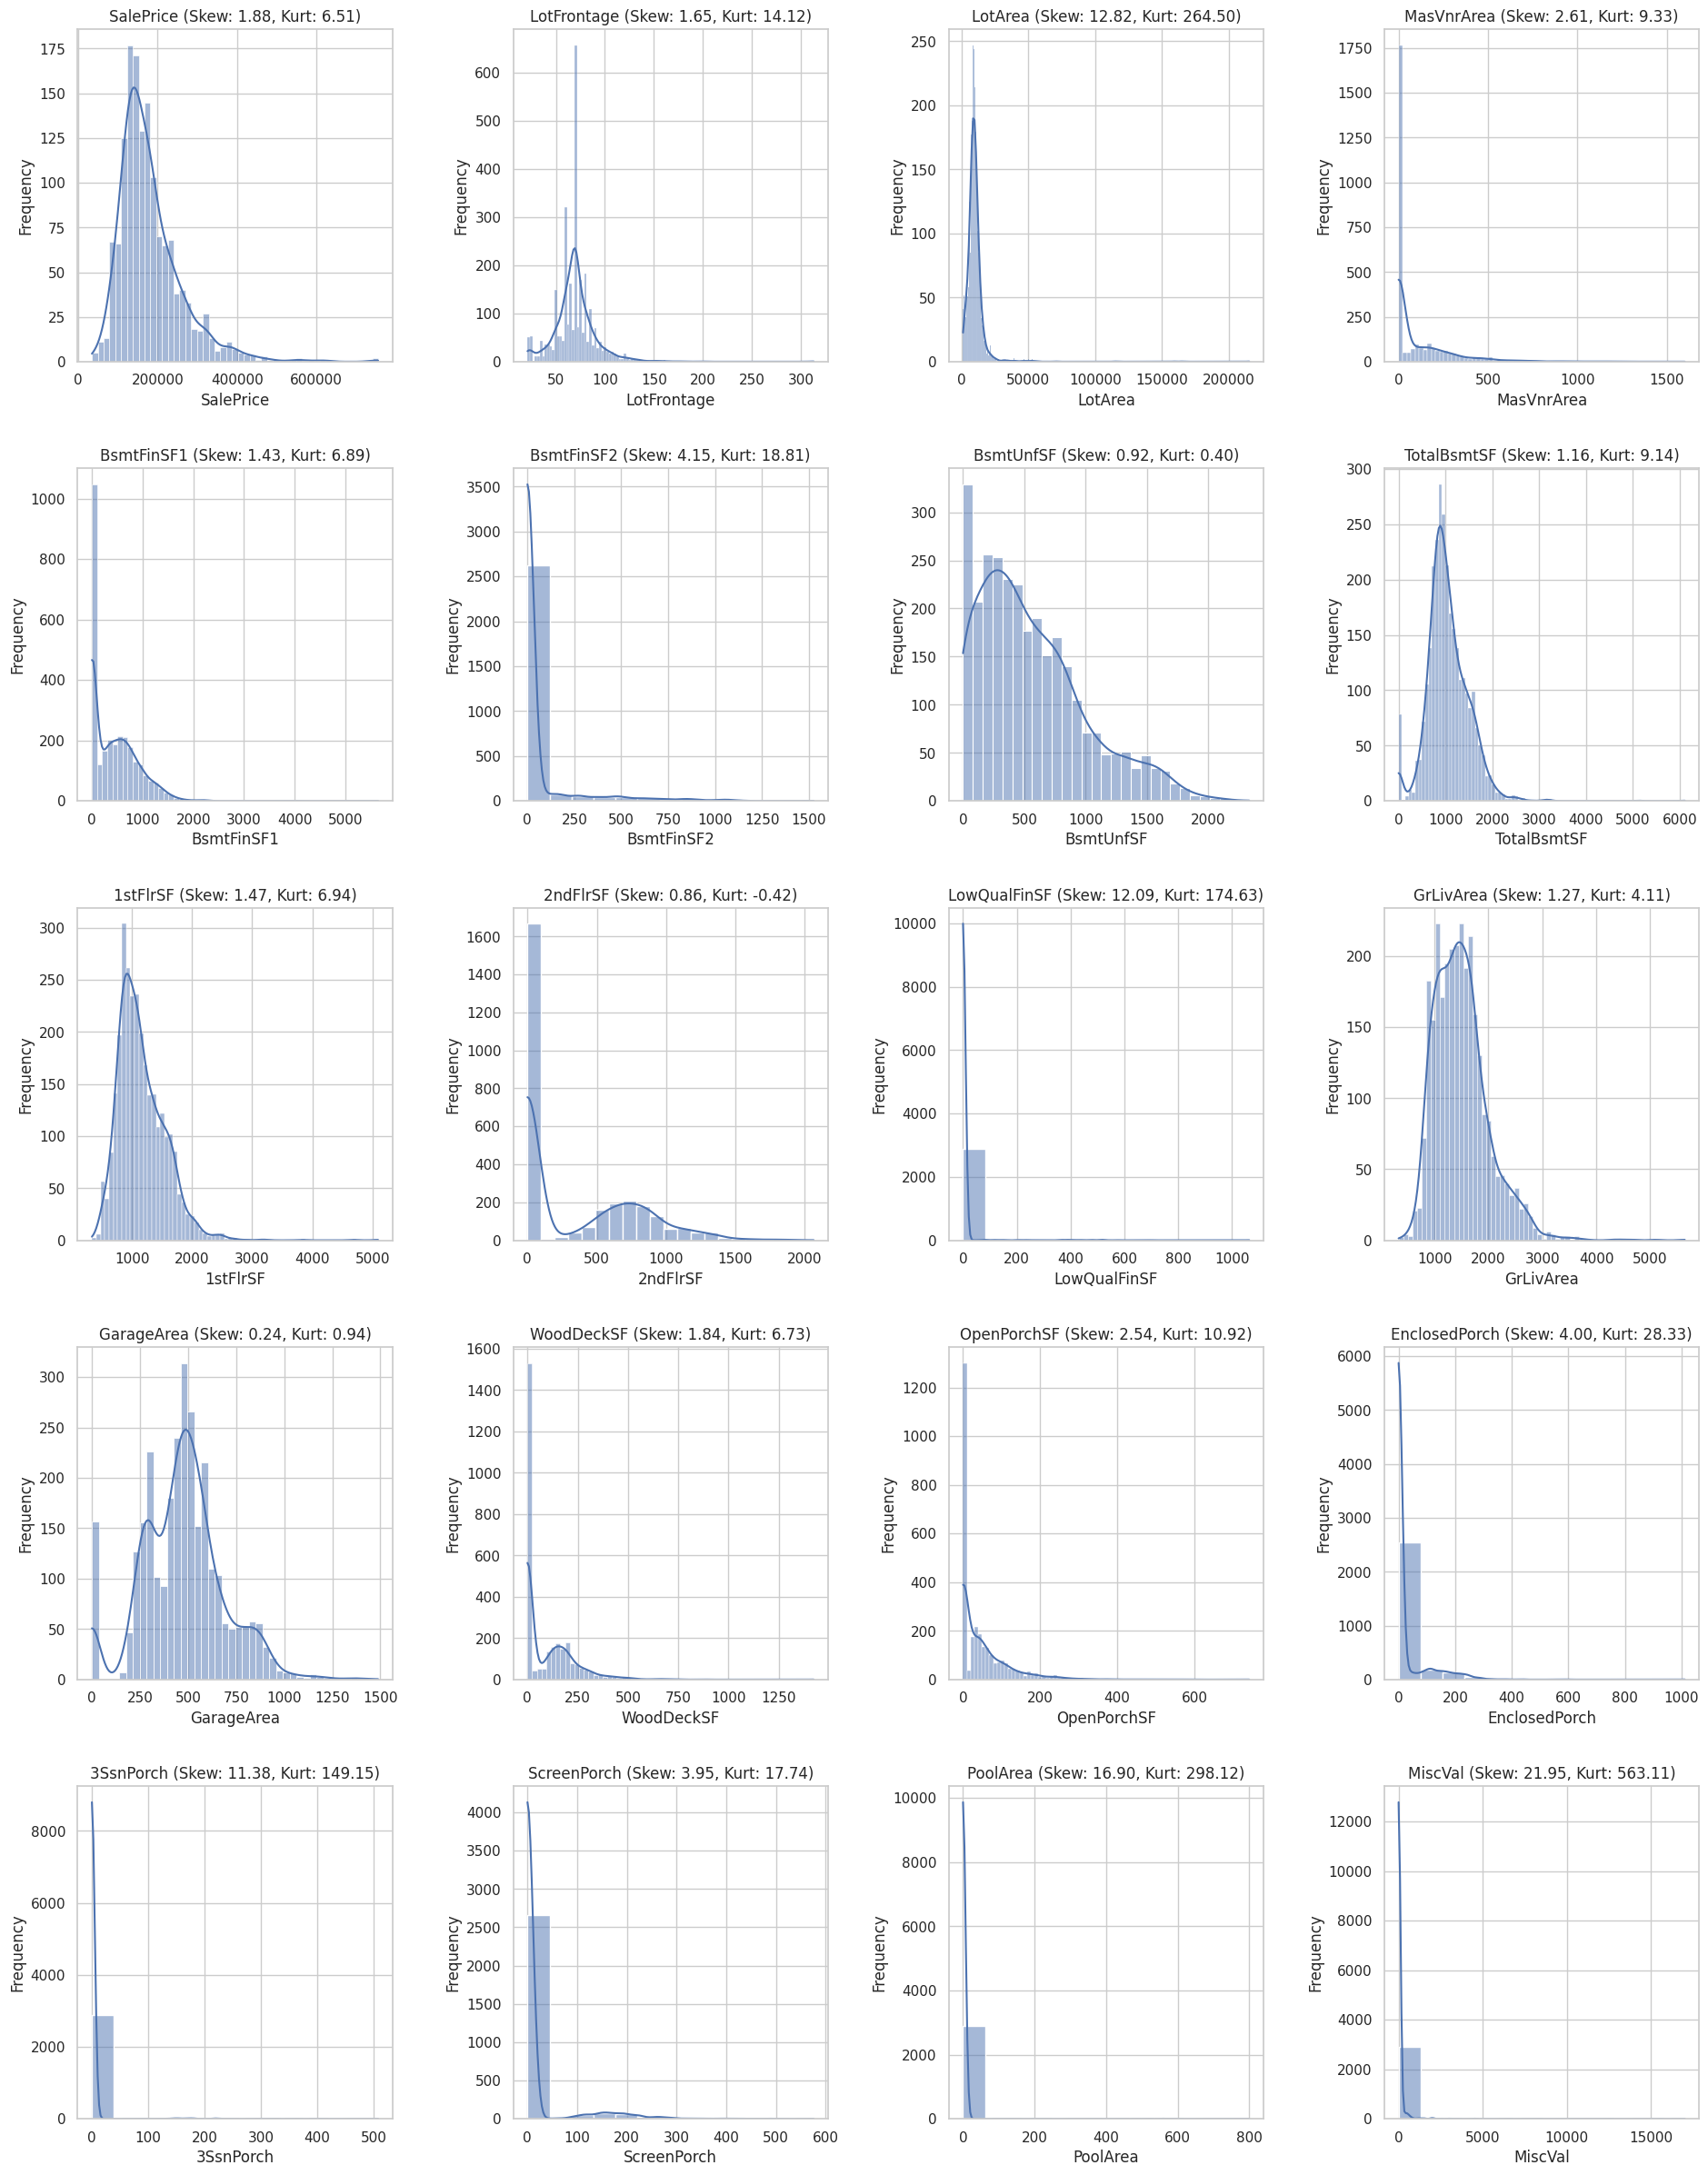

In [67]:
# Features to assess
features = [
    'SalePrice', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
    'ScreenPorch', 'PoolArea', 'MiscVal'
]

# Initialize dictionaries to store results
skewness_results = {}
kurtosis_results = {}
shapiro_results = {}

# Number of rows and columns for subplots
n_rows = 5
n_cols = 4

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 25))
fig.tight_layout(pad=5.0)

# Flatten axes for easy iteration
axes = axes.flatten()

# Calculate skewness, kurtosis, and Shapiro-Wilk test, and plot distributions
for i, feature in enumerate(features):
    skewness_results[feature] = stats.skew(df[feature].dropna())
    kurtosis_results[feature] = stats.kurtosis(df[feature].dropna())
    shapiro_results[feature] = stats.shapiro(df[feature].dropna())

    sns.histplot(df[feature].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(f'{feature} (Skew: {skewness_results[feature]:.2f}, Kurt: {kurtosis_results[feature]:.2f})')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [68]:
# Display skewness and kurtosis
print("Skewness:")
print(skewness_results)

print("\nKurtosis:")
print(kurtosis_results)

# Display Shapiro-Wilk test results
print("\nShapiro-Wilk Test Results (W, p-value):")
print(shapiro_results)

Skewness:
{'SalePrice': 1.880940746034036, 'LotFrontage': 1.6455737855221888, 'LotArea': 12.822431401556724, 'MasVnrArea': 2.6115493751087344, 'BsmtFinSF1': 1.4252334408817189, 'BsmtFinSF2': 4.146033635959022, 'BsmtUnfSF': 0.9195083116601191, 'TotalBsmtSF': 1.1624837493331972, '1stFlrSF': 1.4696044169256821, '2ndFlrSF': 0.8616747488436027, 'LowQualFinSF': 12.088761003370664, 'GrLivArea': 1.269357688230336, 'GarageArea': 0.241217781017102, 'WoodDeckSF': 1.8424328111184782, 'OpenPorchSF': 2.5351137294802557, 'EnclosedPorch': 4.003891220540856, '3SsnPorch': 11.376064682827481, 'ScreenPorch': 3.9466937029936977, 'PoolArea': 16.89832791614449, 'MiscVal': 21.9471948077491}

Kurtosis:
{'SalePrice': 6.509812011089439, 'LotFrontage': 14.120786759828889, 'LotArea': 264.4966320739909, 'MasVnrArea': 9.33348272100738, 'BsmtFinSF1': 6.8943404611257595, 'BsmtFinSF2': 18.809694890446103, 'BsmtUnfSF': 0.4020356208195319, 'TotalBsmtSF': 9.137528895805653, '1stFlrSF': 6.942514097204564, '2ndFlrSF': -0.42

##### Interpretation of Statistical Tests

**Skewness**:
* A skewness value greater than 1 indicates a highly skewed distribution.
* Most variables have high skewness values, indicating that their distributions are not symmetrical.
* 'LotArea', 'LowQualFinSF', 'PoolArea', and 'MiscVal' have extremely high skewness values, indicating severe skewness.

**Kurtosis**:
* A kurtosis value greater than 3 indicates a leptokurtic distribution (heavy-tailed).
* Most variables have high kurtosis values, indicating that their distributions have heavy tails.
* 'LotArea', 'LowQualFinSF', 'PoolArea', and 'MiscVal' have extremely high kurtosis values, indicating extremely heavy-tailed distributions.

**Shapiro-Wilk Test Results:**
* The Shapiro-Wilk test is a normality test that checks if the data follows a normal distribution.
* The test produces a statistic (W) and a p-value.
* A p-value less than 0.05 indicates that the data does not follow a normal distribution.
* Most variables have p-values very close to 0, indicating that they do not follow a normal distribution.
* Only 'GarageArea' has a p-value greater than 0.05, indicating that it may follow a normal distribution.

#### Outlier Detection and Handling
We will create few functions to handle outliers. Instead of removing the datapoints completely, we will replace them with lower and higher threshold values. We will keep some features out from this process. For example, id, latitude, longitude etc.



In [34]:
# List of columns to exclude from outlier handling
excluded_columns = ['Id', 'Neighborhood', 'MoSold', 'YrSold', 'Neighborhood_Decoded', 'Neighborhood_Full', 'Latitude', 'Longitude']

# Selecting all numeric columns
numeric_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Filtering out the excluded columns
numeric_vars = [col for col in numeric_vars if col not in excluded_columns]

# Function to calculate lower and upper thresholds
def outlier_thresholds(dataframe, col_name, q1=0.1, q3=0.9):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# Function to check for outliers in a specific column
def check_outlier(dataframe, col_name):
    if pd.api.types.is_numeric_dtype(dataframe[col_name]):
        low_limit, up_limit = outlier_thresholds(dataframe, col_name)
        return dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)][col_name]
    else:
        return pd.Series([])

# Function to replace outliers with defined thresholds
def replace_with_thresholds(dataframe, variable, q1=0.1, q3=0.9):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1, q3)
    
    # Get the current dtype of the column
    col_dtype = dataframe[variable].dtype
    
    # Cast thresholds to the appropriate dtype
    if pd.api.types.is_integer_dtype(col_dtype):
        low_limit = int(low_limit)
        up_limit = int(up_limit)
    
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

# Iterating through each numeric column to check and handle outliers
for col in numeric_vars:
    outliers = check_outlier(df, col)
    if not outliers.empty:
        print(f"Outliers found in {col}. Handling outliers...")
        replace_with_thresholds(df, col)

print("Outlier handling completed.")


Outliers found in MSZoning. Handling outliers...
Outliers found in LotFrontage. Handling outliers...
Outliers found in LotArea. Handling outliers...
Outliers found in Street. Handling outliers...
Outliers found in LandContour. Handling outliers...
Outliers found in Utilities. Handling outliers...
Outliers found in LandSlope. Handling outliers...
Outliers found in Condition1. Handling outliers...
Outliers found in Condition2. Handling outliers...
Outliers found in OverallCond. Handling outliers...
Outliers found in RoofMatl. Handling outliers...
Outliers found in MasVnrArea. Handling outliers...
Outliers found in ExterQual. Handling outliers...
Outliers found in BsmtCond. Handling outliers...
Outliers found in BsmtFinSF1. Handling outliers...
Outliers found in BsmtFinType2. Handling outliers...
Outliers found in BsmtFinSF2. Handling outliers...
Outliers found in TotalBsmtSF. Handling outliers...
Outliers found in Heating. Handling outliers...
Outliers found in CentralAir. Handling outli

#### Correlation Matrix

We will perform correlation matrix to identify the features which have high correlation with Salesprice but before that we need to remove those features which have only one unique value.


In [35]:
unique_value_counts = df.nunique()
variables_with_one_unique_value = unique_value_counts[unique_value_counts == 1].index.tolist()

print("Variables with unique value count of 1:")
print(variables_with_one_unique_value)

Variables with unique value count of 1:
['Street', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SaleCondition']


In [36]:
# dropping the features which have only one unique value
df.drop(variables_with_one_unique_value, axis=1, inplace=True)

<Axes: >

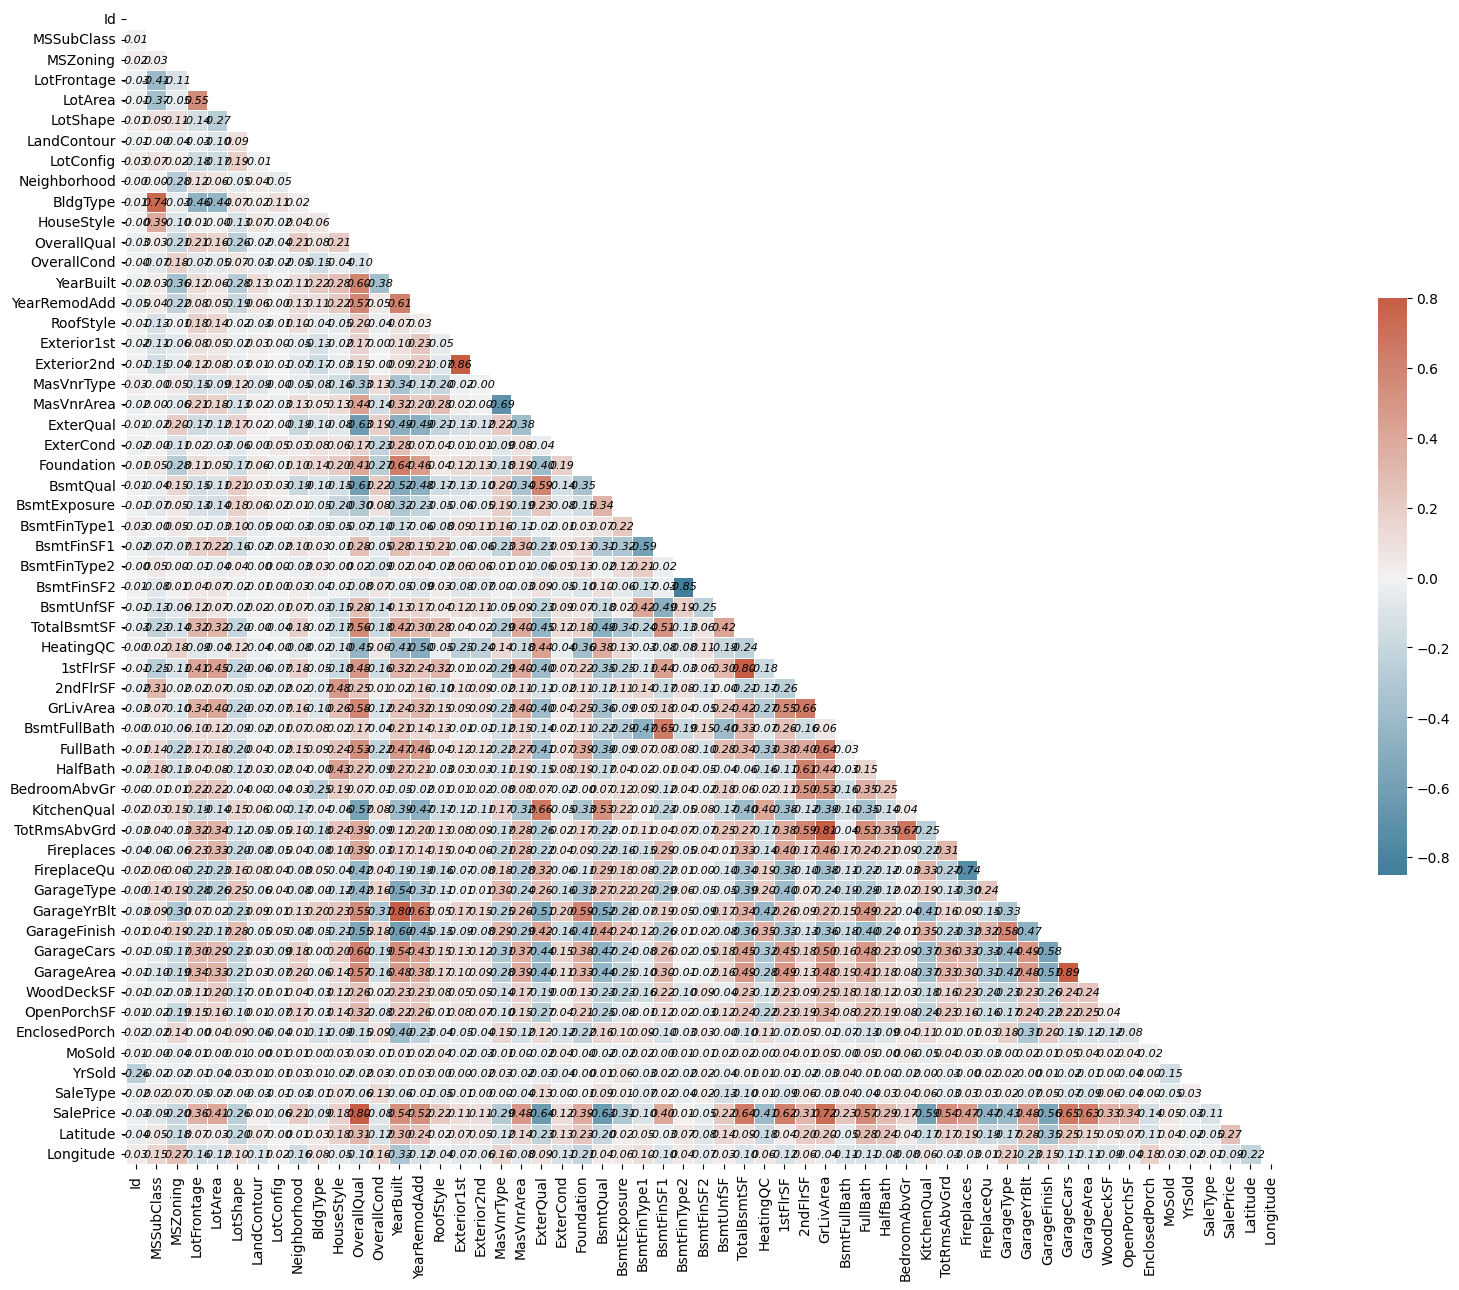

In [37]:
# correlation matrix 
f, ax = plt.subplots(figsize=(25, 15))
numeric_df = df.select_dtypes(include=[np.number])

mat = numeric_df.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=0.8, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot_kws={"size": 8, "color": 'black', "style": 'italic'})

Few features have high correlation pair. We will drop those features to avoid data leakage. We will do that after we create new features which will have high correlation.
#### Feature Engineering

We will be creating few features now


In [38]:
# 1. TotalLivingArea
df['TotalLivingArea'] = df['GrLivArea'] + df['TotalBsmtSF'] + df['1stFlrSF']

# 2. TotalBathroom
df['TotalBathroom'] = df['FullBath'] + df['HalfBath']

# 3. TotalPorchArea
df['TotalPorchArea'] = df['OpenPorchSF'] + df['EnclosedPorch']

# 4. AvgLotSize
df['AvgLotSize'] = df['LotArea'] / df['LotFrontage']

# 5. HouseAge
df['HouseAge'] = df['YrSold'] - df['YearBuilt']

# 6. YearsSinceRemodel
df['YearsSinceRemodel'] = df['YrSold'] - df['YearRemodAdd']

# 7. TotalOutdoorSpace
df['TotalOutdoorSpace'] = df['WoodDeckSF'] + df['OpenPorchSF'] + df['EnclosedPorch']

# 8. BsmtFinRatio
df['BsmtFinRatio'] = (df['BsmtFinSF1'] + df['BsmtFinSF2']) / df['TotalBsmtSF']

# 9. AboveGradeLivingRatio
df['AboveGradeLivingRatio'] = df['GrLivArea'] / df['TotalLivingArea']

# 10. BathroomPerBedroom
df['BathroomPerBedroom'] = df['TotalBathroom'] / df['BedroomAbvGr']

# 11. FireplaceQuality
df['FireplaceQuality'] = df['FireplaceQu'].apply(lambda x: 1 if x == 'Ex' else 0)

# 12. GarageSize
df['GarageSize'] = df['GarageCars'] * df['GarageArea']

# 13. NeighborhoodQuality
df['NeighborhoodQuality'] = df['Neighborhood_Decoded'].apply(lambda x: 1 if x == 'High' else 0)

# 14. HouseStyleQuality
df['HouseStyleQuality'] = df['HouseStyle'].apply(lambda x: 1 if x in ['2Story', '1.5Fin'] else 0)

# 15. TotalRoomDensity
df['TotalRoomDensity'] = df['TotRmsAbvGrd'] / df['TotalLivingArea']

We need to find high correlation feature pairs so that we can remove one from each pair so that our model can avoid overfitting

We will also remove the categorical features which were used for Data Analysis. For modelling we do not need them now. We will also remove the Id column.

In [39]:
#### Checking for the high correlation pairs

def find_high_correlation_features(df, threshold=0.95):
    # Select only numerical columns
    numerical_df = df.select_dtypes(exclude=['object', 'datetime'])
    
    # Remove the Id column (assuming it's named 'Id')
    numerical_df = numerical_df.drop('Id', axis=1)
    
    # Calculate the correlation matrix
    corr_matrix = numerical_df.corr()
    
    # Get the upper triangle of the correlation matrix (excluding the diagonal)
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Find the features with high correlation (above the threshold)
    high_corr_features = [(column, row) for column in upper.columns for row in upper.index if abs(upper.loc[row, column]) > threshold]
    
    return high_corr_features

In [40]:
high_corr_features = find_high_correlation_features(df, threshold=0.95)
print(high_corr_features)

[('HouseAge', 'YearBuilt'), ('YearsSinceRemodel', 'YearRemodAdd')]


Now that we have got the high correlation pairs, we will remove some of the features along with Id, and two object features that we have

In [41]:
# removing 
df = df.drop(['YearBuilt', 'YearRemodAdd' , 'Id', 'Neighborhood_Decoded', 'Neighborhood_Full'   ], axis=1)

In [42]:
# checking for null values one more time 
df.isnull().sum()

MSSubClass                  0
MSZoning                    0
LotFrontage                 0
LotArea                     0
LotShape                    0
LandContour                 0
LotConfig                   0
Neighborhood                0
BldgType                    0
HouseStyle                  0
OverallQual                 0
OverallCond                 0
RoofStyle                   0
Exterior1st                 0
Exterior2nd                 0
MasVnrType                  0
MasVnrArea                  0
ExterQual                   0
ExterCond                   0
Foundation                  0
BsmtQual                    0
BsmtExposure                0
BsmtFinType1                0
BsmtFinSF1                  0
BsmtFinType2                0
BsmtFinSF2                  0
BsmtUnfSF                   0
TotalBsmtSF                 0
HeatingQC                   0
1stFlrSF                    0
2ndFlrSF                    0
GrLivArea                   0
BsmtFullBath                0
FullBath  

In [43]:
# handling BsmtFinRatio null values with mean

df['BsmtFinRatio'] = df['BsmtFinRatio'].fillna(df['BsmtFinRatio'].mean())

In [44]:
df['BathroomPerBedroom'] = df['BathroomPerBedroom'].fillna(df['BathroomPerBedroom'].mean())

In [45]:
# Separate rows with and without SalePrice values
X_test = df[df['SalePrice'].isnull()]  # rows without SalePrice values
X_train = df[df['SalePrice'].notnull()]  # rows with SalePrice values

y_train = X_train['SalePrice']
y_test = X_test['SalePrice']


X_train = X_train.drop('SalePrice', axis=1)
X_test = X_test.drop('SalePrice', axis=1)

In [ ]:
# Separate the actual test set (rows with null SalePrice)
X_test = df[df['SalePrice'].isnull()].drop('SalePrice', axis=1)

# Get the training data (rows with non-null SalePrice)
train_data = df[df['SalePrice'].notnull()]

# Separate features and target
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

# Split the data into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Checking the infinite features and dropping them

In [47]:
inf_features = np.where(np.isinf(X_train).sum(axis=0) > 0)[0]
print(X_train.columns[inf_features])

Index(['BathroomPerBedroom'], dtype='object')


In [48]:
inf_features = np.where(np.isinf(X_val).sum(axis=0) > 0)[0]
print(X_val.columns[inf_features])

Index(['BathroomPerBedroom'], dtype='object')


So we are dropping BathroomPerBedroom feature so that it does not create any problem in future.

In [49]:
X_train = X_train.drop('BathroomPerBedroom', axis=1)
X_val = X_val.drop('BathroomPerBedroom', axis=1)

#### Feature Importance and Feature Selection

We will now determine which features are most important ones to predict SalePrice. We dont want a lot of features in our model. 

**We are using Random Forest Regresor for feature importance and selection The reason behind using this model are :**

- Robustness to Overfitting:

Random Forests are an ensemble method, combining multiple decision trees. This makes them less prone to overfitting compared to single decision trees.
The random sampling of both observations (bagging) and features at each split helps in creating a diverse set of trees, further reducing overfitting.

- Handles Non-linear Relationships:

Unlike linear methods (e.g., Lasso, Ridge regression), Random Forests can capture non-linear relationships between features and the target variable.
This is particularly useful in real-world scenarios where relationships are often complex and non-linear.

- Implicit Feature Selection:

Random Forests perform feature selection inherently during the tree-building process.
At each split, the algorithm chooses the best feature among a random subset, naturally prioritizing more important features.

- Measures Feature Interactions:

Random Forests can capture feature interactions, which simple linear models or correlation-based methods might miss.
This is particularly useful in complex datasets where features might work together in non-obvious ways.

- Stability:

The feature importance scores from Random Forests are generally more stable compared to single decision trees.
The aggregation of many trees helps smooth out the variability in importance scores.

- No Assumptions About Data Distribution:

Unlike parametric methods, Random Forests don't make assumptions about the underlying data distribution.
This makes them versatile and applicable to a wide range of datasets. In our case, we have different kind of distributions of certain features which we have observed previously.

- Handles High-Dimensional Data:

Random Forests can effectively handle datasets with a large number of features relative to the number of observations.
This is particularly useful in scenarios where you have many potential predictors. For our case, we have a lot of features already.

- Built-in Cross-Validation:

Random Forests use out-of-bag (OOB) samples for an internal cross-validation mechanism.
This provides a reliable estimate of feature importance without needing a separate validation set.

- Resistance to Outliers:

We have seen that some of our features had outliers and we ahve handled them. However, we wanted to use Random forest for it's advanced algorithm. Random Forests are generally robust to outliers and noisy data, which can be beneficial when dealing with real-world datasets.

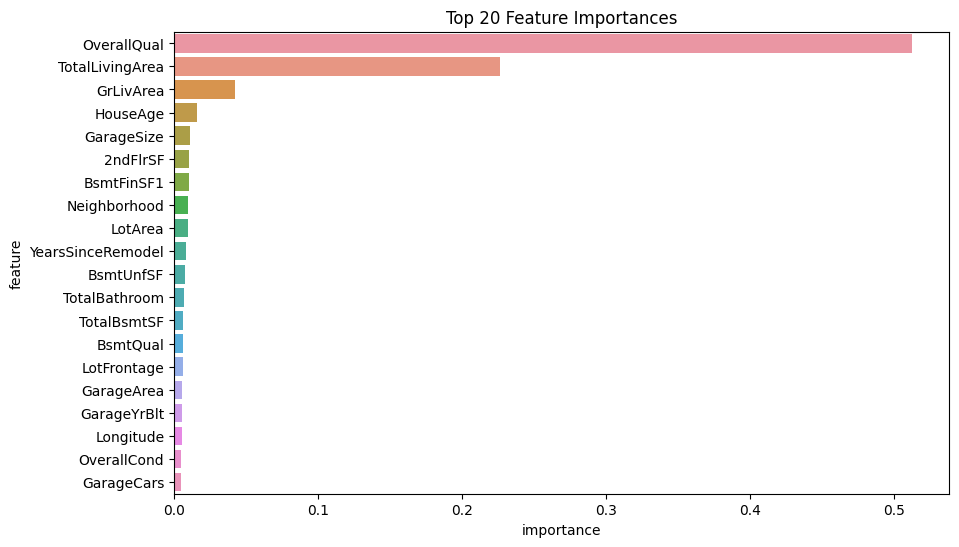

In [50]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Feature Importances')
plt.show()

In [51]:
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
feature_importance.head(20)

feature  importance
10        OverallQual    0.512267
53    TotalLivingArea    0.225965
31          GrLivArea    0.042644
57           HouseAge    0.016196
63         GarageSize    0.011308
30           2ndFlrSF    0.010321
23         BsmtFinSF1    0.010297
7        Neighborhood    0.009895
3             LotArea    0.009539
58  YearsSinceRemodel    0.008367
26          BsmtUnfSF    0.007508
54      TotalBathroom    0.006762
27        TotalBsmtSF    0.006470
20           BsmtQual    0.006198
2         LotFrontage    0.006106
44         GarageArea    0.005274
41        GarageYrBlt    0.005267
52          Longitude    0.005191
11        OverallCond    0.005096
43         GarageCars    0.004966

We want to try some other methods for feature importance and selection. That is why we want to try scaling first.

In [52]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [53]:
# Fit Random Forest on scaled data
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(X_train_scaled, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feature_importance = feature_importance.sort_values('importance', ascending=False)



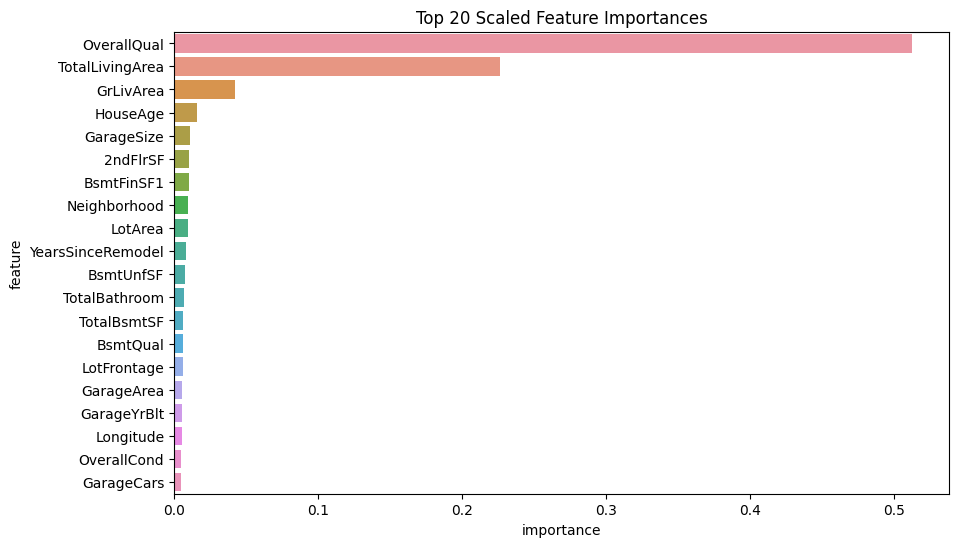

In [54]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
plt.title('Top 20 Scaled Feature Importances')
plt.show()

#### Using Correlation For Feature Importance

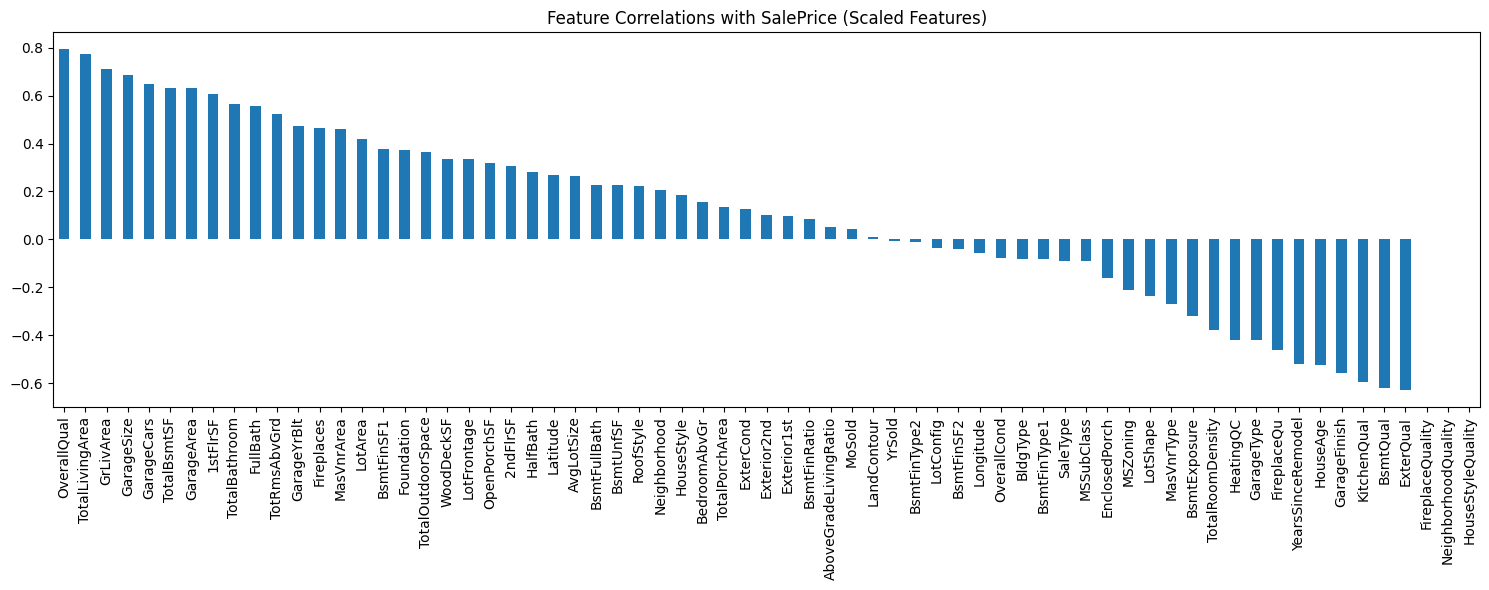

In [55]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

# Combine scaled features with target for correlation analysis
data_scaled = pd.concat([X_train_scaled, y_train], axis=1)
target_column = y_train.name

# 1. Correlation with target variable
correlations = data_scaled.corr()[target_column].sort_values(ascending=False)

# Plot correlations with target
plt.figure(figsize=(15, 6))
correlations.drop(target_column).plot(kind='bar')
plt.title(f'Feature Correlations with {target_column} (Scaled Features)')
plt.tight_layout()
plt.show()

**From the visualization we can surely drop the last 3 features : FireplaceQuality, NeighborhoodQuality and HouseStyleQuality**

In [56]:
# 2. Select top correlated features
correlation_threshold = 0.1  # Adjust this threshold as needed
top_correlated = correlations[abs(correlations) > correlation_threshold].drop(target_column)
print("Top correlated features:")
print(top_correlated)

Top correlated features:
OverallQual          0.792565
TotalLivingArea      0.775243
GrLivArea            0.709073
GarageSize           0.684887
GarageCars           0.649153
TotalBsmtSF          0.632634
GarageArea           0.631763
1stFlrSF             0.607727
TotalBathroom        0.564589
FullBath             0.555030
TotRmsAbvGrd         0.524959
GarageYrBlt          0.471778
Fireplaces           0.465982
MasVnrArea           0.458867
LotArea              0.418852
BsmtFinSF1           0.376029
Foundation           0.372983
TotalOutdoorSpace    0.362972
WoodDeckSF           0.335360
LotFrontage          0.335059
OpenPorchSF          0.318883
2ndFlrSF             0.307979
HalfBath             0.282335
Latitude             0.269035
AvgLotSize           0.265679
BsmtFullBath         0.228940
BsmtUnfSF            0.227727
RoofStyle            0.222893
Neighborhood         0.205323
HouseStyle           0.185174
BedroomAbvGr         0.155340
TotalPorchArea       0.135059
ExterCond      

#### F-score for feature importance

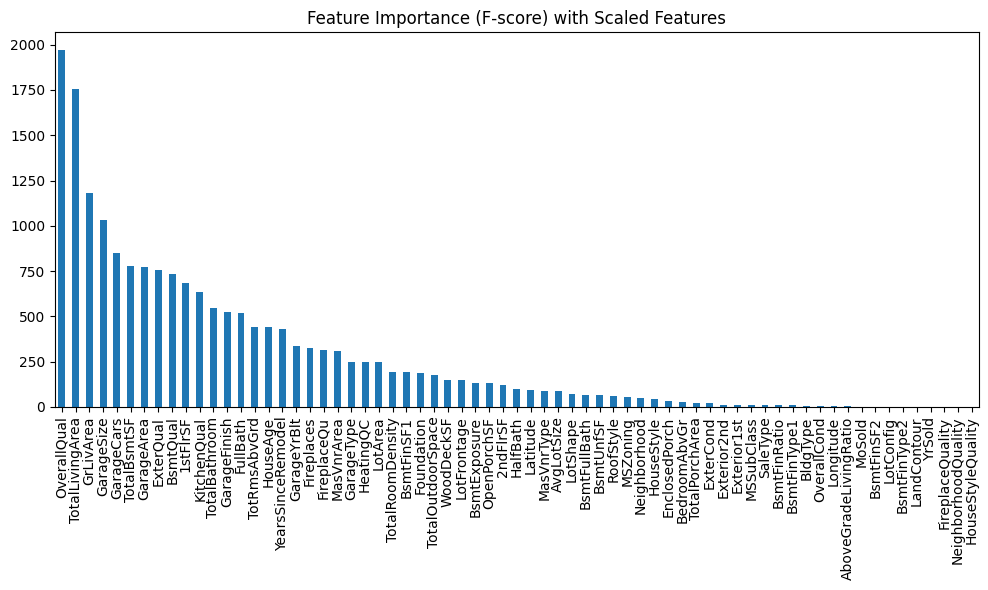

In [57]:
# 6. F-score for feature importance
f_scores, _ = f_regression(X_train_scaled, y_train)
f_scores = pd.Series(f_scores, index=X_train_scaled.columns)
f_scores = f_scores.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
f_scores.plot(kind='bar')
plt.title('Feature Importance (F-score) with Scaled Features')
plt.tight_layout()
plt.show()

**We tried to find out the common features in these two techniques**

In [58]:
common_features = set(top_correlated.index).intersection(set(f_scores.index))

# Convert the result to a list if needed
common_features_list = list(common_features)

# Print the common features
print("Common features:", common_features_list)

Common features: ['Foundation', 'LotShape', 'BedroomAbvGr', 'TotalBsmtSF', 'MasVnrArea', 'GarageType', 'MasVnrType', 'HouseAge', 'TotalRoomDensity', 'ExterQual', 'BsmtExposure', 'AvgLotSize', 'ExterCond', 'HalfBath', 'FullBath', 'Neighborhood', 'TotalPorchArea', 'MSZoning', 'TotalBathroom', 'LotArea', 'BsmtFullBath', 'KitchenQual', 'GarageCars', 'TotalLivingArea', 'GarageYrBlt', 'OpenPorchSF', 'EnclosedPorch', '2ndFlrSF', 'BsmtUnfSF', 'GarageArea', 'LotFrontage', 'Fireplaces', 'FireplaceQu', 'Latitude', '1stFlrSF', 'YearsSinceRemodel', 'WoodDeckSF', 'TotRmsAbvGrd', 'BsmtFinSF1', 'Exterior2nd', 'BsmtQual', 'OverallQual', 'GarageFinish', 'GarageSize', 'HeatingQC', 'GrLivArea', 'HouseStyle', 'RoofStyle', 'TotalOutdoorSpace']


In [59]:
len(common_features_list)

49

#### Permutation Feature Importance
This is another technique that we wanted to try for getting feature importance

In [60]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Calculate permutation importance
result = permutation_importance(
    model, X_val, y_val, n_repeats=60, random_state=42, n_jobs=-1
)

# Create a dataframe of feature importances
pi_feature_importance = pd.DataFrame({
    'feature': X_val.columns,
    'importance': result.importances_mean,
    'std': result.importances_std
})

# Sort features by importance
pi_feature_importance = pi_feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)

# Print the top 20 most important features
print(pi_feature_importance.head(20))

              feature  importance       std
0         OverallQual    0.381588  0.032121
1     TotalLivingArea    0.252428  0.020324
2           GrLivArea    0.027131  0.003595
3        Neighborhood    0.012397  0.005694
4            HouseAge    0.007122  0.001592
5          GarageCars    0.006112  0.001922
6   YearsSinceRemodel    0.005358  0.001401
7        TotRmsAbvGrd    0.005170  0.001817
8         OverallCond    0.003913  0.000556
9            2ndFlrSF    0.003771  0.000948
10         GarageSize    0.003585  0.000700
11            LotArea    0.003504  0.001093
12        KitchenQual    0.002853  0.001069
13         GarageType    0.002765  0.000926
14          BsmtUnfSF    0.002702  0.000679
15      TotalBathroom    0.002645  0.000667
16         BsmtFinSF1    0.002636  0.000873
17           Latitude    0.002552  0.000888
18           BsmtQual    0.002142  0.000806
19          Longitude    0.001986  0.002927


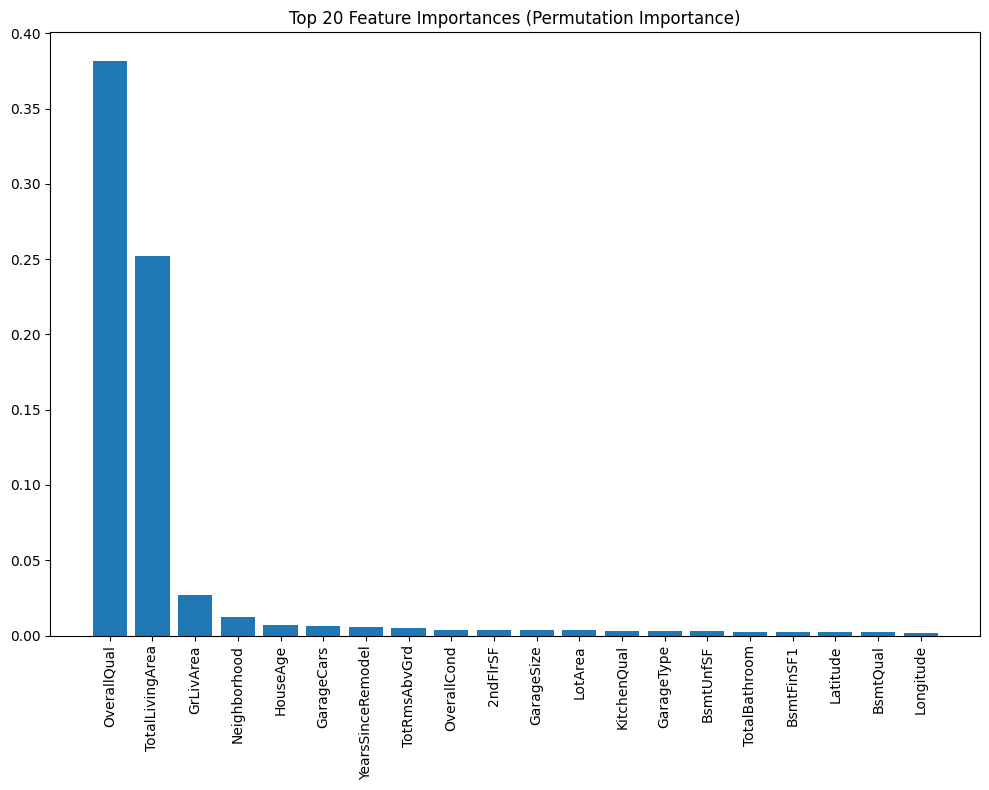

In [61]:
plt.figure(figsize=(10, 8))
plt.bar(pi_feature_importance['feature'][:20], pi_feature_importance['importance'][:20])
plt.xticks(rotation=90)
plt.title('Top 20 Feature Importances (Permutation Importance)')
plt.tight_layout()
plt.show()

# Modelling

Now we will get into baseline modelling with all the features 

In [62]:
# Prepare the data
X_train_selected = X_train
X_val_selected = X_val

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_val_scaled = scaler.transform(X_val_selected)


**Trying with Linear Regression and Decision Tree**

In [63]:
# Combine train and validation sets for cross-validation
X_combined = np.vstack((X_train_scaled, X_val_scaled))
y_combined = np.concatenate((y_train, y_val))

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
}

# Perform cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

In [64]:
for name, model in models.items():
    print(f"\nEvaluating {name}:")
    
    try:
        rmse_scores = cross_val_score(model, X_combined, y_combined, cv=kf, 
                                      scoring='neg_root_mean_squared_error', n_jobs=1)
        r2_scores = cross_val_score(model, X_combined, y_combined, cv=kf, 
                                    scoring='r2', n_jobs=1)
        
        print(f"Cross-validation RMSE: {-rmse_scores.mean():.4f} (+/- {rmse_scores.std() * 2:.4f})")
        print(f"Cross-validation R2 Score: {r2_scores.mean():.4f} (+/- {r2_scores.std() * 2:.4f})")

        # Fit the model on the training data and evaluate on the validation data
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_val_scaled)
        
        mse = mean_squared_error(y_val, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_val, y_pred)
        
        print(f"Validation RMSE: {rmse:.4f}")
        print(f"Validation R2 Score: {r2:.4f}")
    except Exception as e:
        print(f"An error occurred: {str(e)}")


Evaluating Linear Regression:
Cross-validation RMSE: 29073.4837 (+/- 6090.6673)
Cross-validation R2 Score: 0.8558 (+/- 0.0456)
Validation RMSE: 27536.1105
Validation R2 Score: 0.8870

Evaluating Decision Tree:
Cross-validation RMSE: 37708.3540 (+/- 7471.5025)
Cross-validation R2 Score: 0.7556 (+/- 0.0922)
Validation RMSE: 37209.4743
Validation R2 Score: 0.7936


#### Trying with Neural Network


In [65]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)




/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 39356895232.0000 - mae: 181900.3750 - val_loss: 37714542592.0000 - val_mae: 180801.1094 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 38893916160.0000 - mae: 181128.9219 - val_loss: 27075756032.0000 - val_mae: 152764.5781 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 16323891200.0000 - mae: 107714.9844 - val_loss: 3076994304.0000 - val_mae: 46414.7305 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4988199424.0000 - mae: 54991.3711 - val_loss: 1498951168.0000 - val_mae: 30005.3438 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3325306112.0000 - mae: 43112.1133 - val_loss: 1526137344.0000 - val_mae: 30277.0469 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2874379520.0000 - mae: 38072.0586 - val_loss: 1326520704.0000 - val_mae: 27969.7207 - lear

In [66]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

# Make predictions
predictions = model.predict(X_val_scaled)

Test Loss: 943303104.0000
Test MAE: 21773.9258
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


The baseline models are giving poor results. We will now try with only those features which have high positive and negative correlations

## Selected Features For Modelling

Highly correlated features only

In [67]:
top_correlated

OverallQual          0.792565
TotalLivingArea      0.775243
GrLivArea            0.709073
GarageSize           0.684887
GarageCars           0.649153
TotalBsmtSF          0.632634
GarageArea           0.631763
1stFlrSF             0.607727
TotalBathroom        0.564589
FullBath             0.555030
TotRmsAbvGrd         0.524959
GarageYrBlt          0.471778
Fireplaces           0.465982
MasVnrArea           0.458867
LotArea              0.418852
BsmtFinSF1           0.376029
Foundation           0.372983
TotalOutdoorSpace    0.362972
WoodDeckSF           0.335360
LotFrontage          0.335059
OpenPorchSF          0.318883
2ndFlrSF             0.307979
HalfBath             0.282335
Latitude             0.269035
AvgLotSize           0.265679
BsmtFullBath         0.228940
BsmtUnfSF            0.227727
RoofStyle            0.222893
Neighborhood         0.205323
HouseStyle           0.185174
BedroomAbvGr         0.155340
TotalPorchArea       0.135059
ExterCond            0.128628
Exterior2n

In [68]:
top_cor_features = top_correlated[(top_correlated > 0.4) | (top_correlated < -0.4)]

# Convert the result to a list of feature names
top_cor_features_list = top_cor_features.index.tolist()

In [69]:
top_cor_features_list

['OverallQual',
 'TotalLivingArea',
 'GrLivArea',
 'GarageSize',
 'GarageCars',
 'TotalBsmtSF',
 'GarageArea',
 '1stFlrSF',
 'TotalBathroom',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'Fireplaces',
 'MasVnrArea',
 'LotArea',
 'HeatingQC',
 'GarageType',
 'FireplaceQu',
 'YearsSinceRemodel',
 'HouseAge',
 'GarageFinish',
 'KitchenQual',
 'BsmtQual',
 'ExterQual']

## Transformation of selected features

**Now we will try our baseline models again with these features. But before that we will handle any skewness and transform skewed features to log normal features**

In [70]:
def select_features(X_train, X_val, selected_features_list):
    X_train_selected = X_train[selected_features_list]
    X_val_selected = X_val[selected_features_list]
    return X_train_selected, X_val_selected

def log_transform_skewed_features(X_train, X_val, threshold=0.5):
    numeric_feats = X_train.select_dtypes(include=['float64', 'int64']).columns
    skewed_feats = X_train[numeric_feats].apply(lambda x: skew(x.dropna()))
    skewed_feats = skewed_feats[abs(skewed_feats) > threshold]
    skewed_features = skewed_feats.index

    for feat in skewed_features:
        X_train[feat] = np.log1p(X_train[feat])
        X_val[feat] = np.log1p(X_val[feat])
    
    return X_train, X_val, list(skewed_features)

def handle_infinite_values(X_train, X_val):
    # Replace inf with NaN
    X_train = X_train.replace([np.inf, -np.inf], np.nan)
    X_val = X_val.replace([np.inf, -np.inf], np.nan)
    
    # Fill NaN with the mean of the column
    X_train = X_train.fillna(X_train.mean())
    X_val = X_val.fillna(X_train.mean())  # Use train mean for validation set
    
    return X_train, X_val

def scale_features(X_train, X_val):
    scaler = StandardScaler()
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
    X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns, index=X_val.index)
    return X_train_scaled, X_val_scaled, scaler

def preprocess_data(X_train, X_val, selected_features_list, skew_threshold=0.5):
    # Select features
    X_train_selected, X_val_selected = select_features(X_train, X_val, selected_features_list)
    
    # Log transform skewed features
    X_train_transformed, X_val_transformed, skewed_features = log_transform_skewed_features(X_train_selected, X_val_selected, threshold=skew_threshold)
    
    # Handle infinite values
    X_train_cleaned, X_val_cleaned = handle_infinite_values(X_train_transformed, X_val_transformed)
    
    # Scale features
    X_train_scaled, X_val_scaled, scaler = scale_features(X_train_cleaned, X_val_cleaned)
    
    return X_train_scaled, X_val_scaled, skewed_features, scaler

In [ ]:
X_train_processed, X_val_processed, skewed_features, scaler = preprocess_data(X_train, X_val, top_cor_features_list)



## Baseline Modelling (Second Try)

In [72]:
def try_different_models(X_train, X_val, y_train, y_val):
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "ElasticNet": ElasticNet(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "SVR": SVR(),
        "KNN": KNeighborsRegressor(),
        "XGBoost": XGBRegressor(eval_metric='rmse'),
        "LightGBM": LGBMRegressor()
    }

    results = []
    trained_models = {}

    for name, model in models.items():
        start_time = time.time()
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Store the trained model
        trained_models[name] = model
        
        # Make predictions
        train_predictions = model.predict(X_train)
        val_predictions = model.predict(X_val)
        
        # Calculate metrics
        train_mse = mean_squared_error(y_train, train_predictions)
        train_rmse = np.sqrt(train_mse)
        train_r2 = r2_score(y_train, train_predictions)
        
        val_mse = mean_squared_error(y_val, val_predictions)
        val_rmse = np.sqrt(val_mse)
        val_r2 = r2_score(y_val, val_predictions)
        
        end_time = time.time()
        training_time = end_time - start_time
        
        # Store results
        results.append({
            "Model": name,
            "Train RMSE": train_rmse,
            "Train R2": train_r2,
            "Validation RMSE": val_rmse,
            "Validation R2": val_r2,
            "Training Time": training_time
        })
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values("Validation RMSE")
    
    return results_df, trained_models

In [73]:
# Usage
results, trained_models = try_different_models(X_train_processed, X_val_processed, y_train, y_val)

# Display results
print(results)

# Access the best model (lowest Validation RMSE)
best_model_name = results.iloc[0]["Model"]
best_model = trained_models[best_model_name]
print(f"\nBest Model: {best_model_name}")
print(f"Best Model Validation RMSE: {results.iloc[0]['Validation RMSE']}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2280
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 24
[LightGBM] [Info] Start training from score 181125.193065
                Model    Train RMSE  Train R2  Validation RMSE  Validation R2  \
6   Gradient Boosting  16802.865097  0.950413     25725.422160       0.901334   
5       Random Forest  10826.503980  0.979414     26046.141330       0.898859   
10           LightGBM  12208.428742  0.973823     27086.585549       0.890617   
9             XGBoost   1462.162601  0.999625     27739.142647       0.885283   
0   Linear Regression  31209.603918  0.828928     31251.098562       0.854396   
2    Lasso Regression  31209.611482  0.828928     31251.423325       0.854393   
1    Ridge Regression  

## Deep Learning Model

We are training our 8 layer deep learning model with selected features.

In [74]:
def build_and_train_deep_model(X_train, X_val, y_train, y_val, 
                               learning_rate=0.001, 
                               batch_size=32, 
                               epochs=100, 
                               dropout_rate=0.2):
    # Define the model
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(256, activation='relu'),
        Dropout(dropout_rate),
        Dense(512, activation='relu'),
        Dropout(dropout_rate),
        Dense(256, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer
    ])

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

    # Train the model
    start_time = time.time()
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )
    training_time = time.time() - start_time

    # Make predictions
    train_predictions = model.predict(X_train).flatten()
    val_predictions = model.predict(X_val).flatten()

    # Calculate metrics
    train_mse = mean_squared_error(y_train, train_predictions)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, train_predictions)
    val_mse = mean_squared_error(y_val, val_predictions)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_val, val_predictions)

    # Prepare results
    results = {
        "Model": "Deep Learning (TensorFlow)",
        "Train RMSE": train_rmse,
        "Train R2": train_r2,
        "Validation RMSE": val_rmse,
        "Validation R2": val_r2,
        "Training Time": training_time
    }

    return model, results, history

In [75]:
deep_model, deep_results, history = build_and_train_deep_model(
    X_train_processed, X_val_processed, y_train, y_val,
    learning_rate=0.001,
    batch_size=32,
    epochs=100,
    dropout_rate=0.2
)

# Print results
print(deep_results)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 39055650816.0000 - val_loss: 28260282368.0000 - learning_rate: 0.0010
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13222105088.0000 - val_loss: 2308338944.0000 - learning_rate: 0.0010
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2953656832.0000 - val_loss: 1673092864.0000 - learning_rate: 0.0010
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2761735936.0000 - val_loss: 1422193408.0000 - learning_rate: 0.0010
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2450084608.0000 - val_loss: 1566086912.0000 - learning_rate: 0.0010
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2626155520.0000 - val_loss: 2542204672.0000 - learning_rate: 0.0010
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2083766912.0000 - val_loss: 1177686016.0000 - learning_rate: 0.0010
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2030753024.0000 - val_loss: 1138993408.0000 - learning_rate:

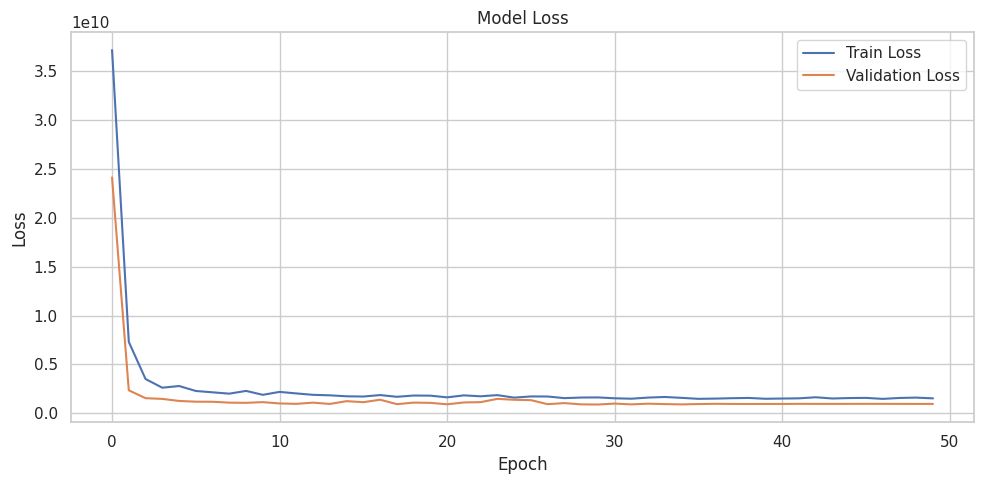

In [113]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

## Hyperparameter Tuning

We will tune each model seperately to save compute resource. We are using GridSearch CV for tuning

**We will take the best model that we got from Machine Learning models and The Deep Learning model for tuning**

In [114]:
# tuning gradient boosting

def tune_gradient_boosting(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    gb = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_



In [117]:
best_gb_params = tune_gradient_boosting(X_train_processed, y_train)
print("Best Gradient Boosting parameters:", best_gb_params)

Best Gradient Boosting parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


**Now we will do hyperparameter tuning on the second best model : Random Forest**

In [78]:
# tuning random forest

def tune_random_forest(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [1.0, 'sqrt', 'log2']  # Changed 'auto' to 1.0
    }

    rf = RandomForestRegressor(random_state=42)
    
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    return grid_search.best_params_



In [79]:
# Use the function
best_rf_params = tune_random_forest(X_train_processed, y_train)

print("Best Random Forest parameters:", best_rf_params)

Best Random Forest parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


## Building Gradient Boosting Model based on the best hyperparameters

In [121]:
def build_and_train_gradient_boosting(X_train, X_val, y_train, y_val):
    # Create the model with the best parameters
    best_params = {
        'learning_rate': 0.1,
        'max_depth': 4,
        'min_samples_leaf': 1,
        'min_samples_split': 10,
        'n_estimators': 200
    }
    
    gb_model = GradientBoostingRegressor(**best_params, random_state=42)
    
    # Train the model
    start_time = time.time()
    gb_model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    train_predictions = gb_model.predict(X_train)
    val_predictions = gb_model.predict(X_val)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, train_predictions)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, train_predictions)
    
    val_mse = mean_squared_error(y_val, val_predictions)
    val_rmse = np.sqrt(val_mse)
    val_r2 = r2_score(y_val, val_predictions)
    
    # Prepare results
    results = {
        "Model": "Gradient Boosting (Best Parameters)",
        "Train RMSE": train_rmse,
        "Train R2": train_r2,
        "Validation RMSE": val_rmse,
        "Validation R2": val_r2,
        "Training Time": training_time
    }
    
    return gb_model, results

In [122]:
# Use the function
gb_model, gb_results = build_and_train_gradient_boosting(X_train_processed, X_val_processed, y_train, y_val)

# Print results
print(gb_results)

{'Model': 'Gradient Boosting (Best Parameters)', 'Train RMSE': 9635.141982088855, 'Train R2': 0.9836950995468902, 'Validation RMSE': 25395.863406245982, 'Validation R2': 0.903845745552171, 'Training Time': 1.137516736984253}


## Saving the Gradient Boosting Model 

In [125]:
# Save the model
with open('gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(gb_model, f)

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the list of selected features
with open('selected_features.pkl', 'wb') as f:
    pickle.dump(top_cor_features_list, f)

# Save the list of skewed features
with open('skewed_features.pkl', 'wb') as f:
    pickle.dump(skewed_features, f)



## Building the Random Forest Model with Best parameters
We will build the Random Forest model with best parameters.

In [80]:
best_rf_model = RandomForestRegressor(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

# Fit the model on the training data
best_rf_model.fit(X_train_processed, y_train)

# Make predictions on the training and validation sets
train_predictions = best_rf_model.predict(X_train_processed)
val_predictions = best_rf_model.predict(X_val_processed)

# Calculate metrics
train_mse = mean_squared_error(y_train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_predictions)

val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, val_predictions)

# Print the results
print("Random Forest Model Performance:")
print(f"Training MSE: {train_mse:.4f}")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Training R-squared: {train_r2:.4f}")
print(f"\nValidation MSE: {val_mse:.4f}")
print(f"Validation RMSE: {val_rmse:.4f}")
print(f"Validation R-squared: {val_r2:.4f}")

Random Forest Model Performance:
Training MSE: 109816240.0885
Training RMSE: 10479.3244
Training R-squared: 0.9807

Validation MSE: 661492876.6941
Validation RMSE: 25719.5038
Validation R-squared: 0.9014


## Conclusion

Since the validation R2 for Gradient Boosting model was higher than the Deep Learning model and Random Forest model, we wanted to use the best performing model. We have saved the model for using it. For the application, we will create seperate python files which will use the models that we have exported from this notebook. Thank you.

In [ ]:
# # flask app.py

# from flask import Flask, request, jsonify
# import pandas as pd
# import pickle
# import numpy as np

# app = Flask(__name__)

# # Load the model and other necessary components
# with open('gradient_boosting_model.pkl', 'rb') as f:
#     model = pickle.load(f)
# with open('scaler.pkl', 'rb') as f:
#     scaler = pickle.load(f)
# with open('selected_features.pkl', 'rb') as f:
#     selected_features = pickle.load(f)
# with open('skewed_features.pkl', 'rb') as f:
#     skewed_features = pickle.load(f)

# def preprocess_input(input_data):
#     # Select features
#     input_selected = input_data[selected_features]
    
#     # Log transform skewed features
#     for feat in skewed_features:
#         input_selected[feat] = np.log1p(input_selected[feat])
    
#     # Handle infinite values
#     input_selected = input_selected.replace([np.inf, -np.inf], np.nan)
#     input_selected = input_selected.fillna(input_selected.mean())
    
#     # Scale features
#     input_scaled = pd.DataFrame(scaler.transform(input_selected), 
#                                 columns=input_selected.columns, 
#                                 index=input_selected.index)
    
#     return input_scaled

# @app.route('/predict', methods=['POST'])
# def predict():
#     data = request.json
#     input_df = pd.DataFrame(data, index=[0])
#     processed_input = preprocess_input(input_df)
#     prediction = model.predict(processed_input)[0]
#     return jsonify({'prediction': prediction})

# if __name__ == '__main__':
#     app.run(debug=True)


In [ ]:
# # streamlit_app.py

# import streamlit as st
# import pandas as pd
# import requests

# # Define the encoding dictionaries
# encodings = {
#     'ExterQual': {'Ex': 0, 'Fa': 1, 'Gd': 2, 'TA': 3},
#     'HeatingQC': {'Ex': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'TA': 4},
#     'GarageType': {'2Types': 0, 'Attchd': 1, 'Basment': 2, 'BuiltIn': 3, 'CarPort': 4, 'Detchd': 5},
#     'FireplaceQu': {'Ex': 0, 'Fa': 1, 'Gd': 2, 'Po': 3, 'TA': 4},
#     'GarageFinish': {'Fin': 0, 'RFn': 1, 'Unf': 2},
#     'KitchenQual': {'Ex': 0, 'Fa': 1, 'Gd': 2, 'TA': 3},
#     'BsmtQual': {'Ex': 0, 'Fa': 1, 'Gd': 2, 'TA': 3}
# }

# st.title('House Price Predictor in Iowa')

# # Create input fields for each feature
# overall_qual = st.slider('Overall Quality', 1, 10, 5)
# total_living_area = st.number_input('Total Living Area (sq ft)', min_value=0)
# gr_liv_area = st.number_input('Above Ground Living Area (sq ft)', min_value=0)
# garage_size = st.number_input('Garage Size (cars)', min_value=0)
# garage_cars = st.number_input('Garage Cars', min_value=0)
# total_bsmt_sf = st.number_input('Total Basement Area (sq ft)', min_value=0)
# garage_area = st.number_input('Garage Area (sq ft)', min_value=0)
# first_flr_sf = st.number_input('First Floor Area (sq ft)', min_value=0)
# total_bathroom = st.number_input('Total Bathrooms', min_value=0)
# full_bath = st.number_input('Full Bathrooms', min_value=0)
# tot_rms_abv_grd = st.number_input('Total Rooms Above Ground', min_value=0)
# garage_yr_blt = st.number_input('Garage Year Built', min_value=1900, max_value=2023)
# fireplaces = st.number_input('Number of Fireplaces', min_value=0)
# mas_vnr_area = st.number_input('Masonry Veneer Area (sq ft)', min_value=0)
# lot_area = st.number_input('Lot Area (sq ft)', min_value=0)
# heating_qc = st.selectbox('Heating Quality', list(encodings['HeatingQC'].keys()))
# garage_type = st.selectbox('Garage Type', list(encodings['GarageType'].keys()))
# fireplace_qu = st.selectbox('Fireplace Quality', list(encodings['FireplaceQu'].keys()))
# years_since_remodel = st.number_input('Years Since Remodel', min_value=0)
# house_age = st.number_input('House Age (years)', min_value=0)
# garage_finish = st.selectbox('Garage Finish', list(encodings['GarageFinish'].keys()))
# kitchen_qual = st.selectbox('Kitchen Quality', list(encodings['KitchenQual'].keys()))
# bsmt_qual = st.selectbox('Basement Quality', list(encodings['BsmtQual'].keys()))
# exter_qual = st.selectbox('Exterior Quality', list(encodings['ExterQual'].keys()))

# if st.button('Predict Price'):
#     # Prepare the input data
#     input_data = {
#         'OverallQual': overall_qual,
#         'TotalLivingArea': total_living_area,
#         'GrLivArea': gr_liv_area,
#         'GarageSize': garage_size,
#         'GarageCars': garage_cars,
#         'TotalBsmtSF': total_bsmt_sf,
#         'GarageArea': garage_area,
#         '1stFlrSF': first_flr_sf,
#         'TotalBathroom': total_bathroom,
#         'FullBath': full_bath,
#         'TotRmsAbvGrd': tot_rms_abv_grd,
#         'GarageYrBlt': garage_yr_blt,
#         'Fireplaces': fireplaces,
#         'MasVnrArea': mas_vnr_area,
#         'LotArea': lot_area,
#         'HeatingQC': encodings['HeatingQC'][heating_qc],
#         'GarageType': encodings['GarageType'][garage_type],
#         'FireplaceQu': encodings['FireplaceQu'][fireplace_qu],
#         'YearsSinceRemodel': years_since_remodel,
#         'HouseAge': house_age,
#         'GarageFinish': encodings['GarageFinish'][garage_finish],
#         'KitchenQual': encodings['KitchenQual'][kitchen_qual],
#         'BsmtQual': encodings['BsmtQual'][bsmt_qual],
#         'ExterQual': encodings['ExterQual'][exter_qual]
#     }

#     # Send a POST request to the Flask API
#     response = requests.post('http://localhost:5000/predict', json=input_data)
    
#     if response.status_code == 200:
#         prediction = response.json()['prediction']
#         st.success(f'Predicted House Price: ${prediction:,.2f}')
#     else:
#         st.error('An error occurred while making the prediction.')

